In [661]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Part1:  Data Cleaning Before Sentiment

In [662]:
df=pd.read_csv("/Users/n.y.r/Desktop/EPIK/Final_df.csv")
df.head(20)

,ConversationId,ConversationInitiated,ConversationDurationMilliseconds,MMS,BuyerNumTruncated,ParticipantRole,QueueDuration,Duration,Abandoned,VisitorWait,...,column just to make the vlookup work,Volunteer Contributed,have buyer id & conversation ID,buyer IDs,Buyer In Conversation,Buyer City,Offered Resources (Bronze Standard),Purchase Attempt Number,Final Purchase (Gold Standard),Accepted Resources (Silver Standard)
0,57e6f59d37da7adc1d231297,42637.91111,1057905,0,50398050.0,Visitor,114265.0,74937.0,1,114265.0,...,NaN,Yes,Yes57e6f59d37da7adc1d231297,00Q1600001CqoSyEAJ,00Q1600001CqoSyEAJ,Portland,0,1,1,0
1,57e6f59d37da7adc1d231297,42637.91111,1057905,0,50398050.0,Visitor,NaN,39328.0,1,39328.0,...,NaN,Yes,Yes57e6f59d37da7adc1d231297,00Q1600001CqoSyEAJ,00Q1600001CqoSyEAJ,Portland,0,1,1,0
2,57e6f59d37da7adc1d231297,42637.91111,1057905,0,NaN,Agent,NaN,35879.0,1,NaN,...,Yes,Yes,N/A57e6f59d37da7adc1d231297,NaN,00Q1600001CqoSyEAJ,Portland,0,1,1,0
3,57e6f59d37da7adc1d231297,42637.91111,1057905,0,50398050.0,Visitor,NaN,907761.0,1,NaN,...,NaN,Yes,Yes57e6f59d37da7adc1d231297,00Q1600001CqoSyEAJ,00Q1600001CqoSyEAJ,Portland,0,1,1,0
4,57e6f6ec37da7adc1d2319c7,42637.91528,963694,0,23969147.0,Visitor,NaN,6727.0,1,NaN,...,NaN,Yes,Yes57e6f6ec37da7adc1d2319c7,00Q1600001CqoTyEAJ,00Q1600001CqoTyEAJ,San Diego,0,1,1,0
5,57e6f6ec37da7adc1d2319c7,42637.91528,963694,0,23969147.0,Visitor,NaN,43570.0,1,NaN,...,NaN,Yes,Yes57e6f6ec37da7adc1d2319c7,00Q1600001CqoTyEAJ,00Q1600001CqoTyEAJ,San Diego,0,1,1,0
6,57e6f6ec37da7adc1d2319c7,42637.91528,963694,0,23969147.0,Visitor,NaN,913397.0,1,NaN,...,NaN,Yes,Yes57e6f6ec37da7adc1d2319c7,00Q1600001CqoTyEAJ,00Q1600001CqoTyEAJ,San Diego,0,1,1,0
7,57e6fccd37da7adc1d2330f9,42637.93264,1549999,0,85821287.0,Visitor,67658.0,67658.0,1,67658.0,...,NaN,Yes,Yes57e6fccd37da7adc1d2330f9,00Q1600001CqucsEAB,00Q1600001CqucsEAB,San Diego,0,1,0,0
8,57e6fccd37da7adc1d2330f9,42637.93264,1549999,0,NaN,Agent,NaN,13211.0,1,NaN,...,Yes,Yes,N/A57e6fccd37da7adc1d2330f9,NaN,00Q1600001CqucsEAB,San Diego,0,1,0,0
9,57e6fccd37da7adc1d2330f9,42637.93264,1549999,0,NaN,Agent,NaN,105770.0,1,NaN,...,Yes,Yes,N/A57e6fccd37da7adc1d2330f9,NaN,00Q1600001CqucsEAB,San Diego,0,1,0,0


In [663]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48102 entries, 0 to 48101
Data columns (total 38 columns):
ConversationId                           48102 non-null object
ConversationInitiated                    48102 non-null float64
ConversationDurationMilliseconds         48102 non-null int64
MMS                                      48102 non-null int64
BuyerNumTruncated                        23864 non-null float64
ParticipantRole                          48102 non-null object
QueueDuration                            5668 non-null float64
Duration                                 47831 non-null float64
Abandoned                                48102 non-null int64
VisitorWait                              21753 non-null float64
AnyText                                  47831 non-null object
ConversationEndedBy                      48102 non-null object
ConversationEndedCategory                48084 non-null object
ConversationEndedSubCategory             0 non-null float64
Id         

In [664]:
# Drop those irrrelevant columns
df=df.drop(columns=['ConversationInitiated','column just  to make the vlookup work','have buyer id & conversation ID','Id','Initiated','Event','ConversationEndedSubCategory','Group','ParticipantUserName','ClaimedById','ClaimedByUserName','Have buyer ID','Buyer-paired conversation ID','Have buyer ID.1','Real buyer conversation','Volunteer-paired conversation ID','Volunteer Contributed','buyer IDs'])
df=df.drop(columns=['ParticipantId'])
df=df.drop(columns=['BuyerNumTruncated','MMS'])

In [665]:
df['AnyText']=df['AnyText'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48102 entries, 0 to 48101
Data columns (total 17 columns):
ConversationId                          48102 non-null object
ConversationDurationMilliseconds        48102 non-null int64
ParticipantRole                         48102 non-null object
QueueDuration                           5668 non-null float64
Duration                                47831 non-null float64
Abandoned                               48102 non-null int64
VisitorWait                             21753 non-null float64
AnyText                                 48102 non-null object
ConversationEndedBy                     48102 non-null object
ConversationEndedCategory               48084 non-null object
SalesForceBuyerCaseID                   23864 non-null object
Buyer In Conversation                   48102 non-null object
Buyer City                              48102 non-null object
Offered Resources (Bronze Standard)     48102 non-null int64
Purchase Attempt Number 

In [666]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
df['AnyText'] = df['AnyText'].apply(remove_punctuation)
df.head(10)

,ConversationId,ConversationDurationMilliseconds,ParticipantRole,QueueDuration,Duration,Abandoned,VisitorWait,AnyText,ConversationEndedBy,ConversationEndedCategory,SalesForceBuyerCaseID,Buyer In Conversation,Buyer City,Offered Resources (Bronze Standard),Purchase Attempt Number,Final Purchase (Gold Standard),Accepted Resources (Silver Standard)
0,57e6f59d37da7adc1d231297,1057905,Visitor,114265.0,74937.0,1,114265.0,Hey Rachel lets play babe,SYSTEM,Timeout,00Q1600001CqoSyEAJ,00Q1600001CqoSyEAJ,Portland,0,1,1,0
1,57e6f59d37da7adc1d231297,1057905,Visitor,NaN,39328.0,1,39328.0,Whatever,SYSTEM,Timeout,00Q1600001CqoSyEAJ,00Q1600001CqoSyEAJ,Portland,0,1,1,0
2,57e6f59d37da7adc1d231297,1057905,Agent,NaN,35879.0,1,NaN,Gimme a call,SYSTEM,Timeout,NaN,00Q1600001CqoSyEAJ,Portland,0,1,1,0
3,57e6f59d37da7adc1d231297,1057905,Visitor,NaN,907761.0,1,NaN,Nah,SYSTEM,Timeout,00Q1600001CqoSyEAJ,00Q1600001CqoSyEAJ,Portland,0,1,1,0
4,57e6f6ec37da7adc1d2319c7,963694,Visitor,NaN,6727.0,1,NaN,Hello I saw your ad and was wondering if you d...,SYSTEM,Timeout,00Q1600001CqoTyEAJ,00Q1600001CqoTyEAJ,San Diego,0,1,1,0
5,57e6f6ec37da7adc1d2319c7,963694,Visitor,NaN,43570.0,1,NaN,I didnt know,SYSTEM,Timeout,00Q1600001CqoTyEAJ,00Q1600001CqoTyEAJ,San Diego,0,1,1,0
6,57e6f6ec37da7adc1d2319c7,963694,Visitor,NaN,913397.0,1,NaN,This was a joke made on my friends phone I did...,SYSTEM,Timeout,00Q1600001CqoTyEAJ,00Q1600001CqoTyEAJ,San Diego,0,1,1,0
7,57e6fccd37da7adc1d2330f9,1549999,Visitor,67658.0,67658.0,1,67658.0,Just noticed your posting on BP Will you be av...,SYSTEM,Timeout,00Q1600001CqucsEAB,00Q1600001CqucsEAB,San Diego,0,1,0,0
8,57e6fccd37da7adc1d2330f9,1549999,Agent,NaN,13211.0,1,NaN,your is on file with law enforcement arrests ...,SYSTEM,Timeout,NaN,00Q1600001CqucsEAB,San Diego,0,1,0,0
9,57e6fccd37da7adc1d2330f9,1549999,Agent,NaN,105770.0,1,NaN,Are you aware that many of the girls who get i...,SYSTEM,Timeout,NaN,00Q1600001CqucsEAB,San Diego,0,1,0,0


#### Calculate the Text Messages Length

In [667]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)
df['Sentence_Length'] = df['AnyText'].apply(length)
df.head(10)

,ConversationId,ConversationDurationMilliseconds,ParticipantRole,QueueDuration,Duration,Abandoned,VisitorWait,AnyText,ConversationEndedBy,ConversationEndedCategory,SalesForceBuyerCaseID,Buyer In Conversation,Buyer City,Offered Resources (Bronze Standard),Purchase Attempt Number,Final Purchase (Gold Standard),Accepted Resources (Silver Standard),Sentence_Length
0,57e6f59d37da7adc1d231297,1057905,Visitor,114265.0,74937.0,1,114265.0,Hey Rachel lets play babe,SYSTEM,Timeout,00Q1600001CqoSyEAJ,00Q1600001CqoSyEAJ,Portland,0,1,1,0,25
1,57e6f59d37da7adc1d231297,1057905,Visitor,NaN,39328.0,1,39328.0,Whatever,SYSTEM,Timeout,00Q1600001CqoSyEAJ,00Q1600001CqoSyEAJ,Portland,0,1,1,0,9
2,57e6f59d37da7adc1d231297,1057905,Agent,NaN,35879.0,1,NaN,Gimme a call,SYSTEM,Timeout,NaN,00Q1600001CqoSyEAJ,Portland,0,1,1,0,13
3,57e6f59d37da7adc1d231297,1057905,Visitor,NaN,907761.0,1,NaN,Nah,SYSTEM,Timeout,00Q1600001CqoSyEAJ,00Q1600001CqoSyEAJ,Portland,0,1,1,0,3
4,57e6f6ec37da7adc1d2319c7,963694,Visitor,NaN,6727.0,1,NaN,Hello I saw your ad and was wondering if you d...,SYSTEM,Timeout,00Q1600001CqoTyEAJ,00Q1600001CqoTyEAJ,San Diego,0,1,1,0,56
5,57e6f6ec37da7adc1d2319c7,963694,Visitor,NaN,43570.0,1,NaN,I didnt know,SYSTEM,Timeout,00Q1600001CqoTyEAJ,00Q1600001CqoTyEAJ,San Diego,0,1,1,0,13
6,57e6f6ec37da7adc1d2319c7,963694,Visitor,NaN,913397.0,1,NaN,This was a joke made on my friends phone I did...,SYSTEM,Timeout,00Q1600001CqoTyEAJ,00Q1600001CqoTyEAJ,San Diego,0,1,1,0,71
7,57e6fccd37da7adc1d2330f9,1549999,Visitor,67658.0,67658.0,1,67658.0,Just noticed your posting on BP Will you be av...,SYSTEM,Timeout,00Q1600001CqucsEAB,00Q1600001CqucsEAB,San Diego,0,1,0,0,154
8,57e6fccd37da7adc1d2330f9,1549999,Agent,NaN,13211.0,1,NaN,your is on file with law enforcement arrests ...,SYSTEM,Timeout,NaN,00Q1600001CqucsEAB,San Diego,0,1,0,0,61
9,57e6fccd37da7adc1d2330f9,1549999,Agent,NaN,105770.0,1,NaN,Are you aware that many of the girls who get i...,SYSTEM,Timeout,NaN,00Q1600001CqucsEAB,San Diego,0,1,0,0,80


In [668]:
df['Conversation_Length']=df.groupby(["ConversationId"])['Sentence_Length'].transform(lambda x: sum(x))

In [669]:
df.head(40)

,ConversationId,ConversationDurationMilliseconds,ParticipantRole,QueueDuration,Duration,Abandoned,VisitorWait,AnyText,ConversationEndedBy,ConversationEndedCategory,SalesForceBuyerCaseID,Buyer In Conversation,Buyer City,Offered Resources (Bronze Standard),Purchase Attempt Number,Final Purchase (Gold Standard),Accepted Resources (Silver Standard),Sentence_Length,Conversation_Length
0,57e6f59d37da7adc1d231297,1057905,Visitor,114265.0,74937.0,1,114265.0,Hey Rachel lets play babe,SYSTEM,Timeout,00Q1600001CqoSyEAJ,00Q1600001CqoSyEAJ,Portland,0,1,1,0,25,50
1,57e6f59d37da7adc1d231297,1057905,Visitor,NaN,39328.0,1,39328.0,Whatever,SYSTEM,Timeout,00Q1600001CqoSyEAJ,00Q1600001CqoSyEAJ,Portland,0,1,1,0,9,50
2,57e6f59d37da7adc1d231297,1057905,Agent,NaN,35879.0,1,NaN,Gimme a call,SYSTEM,Timeout,NaN,00Q1600001CqoSyEAJ,Portland,0,1,1,0,13,50
3,57e6f59d37da7adc1d231297,1057905,Visitor,NaN,907761.0,1,NaN,Nah,SYSTEM,Timeout,00Q1600001CqoSyEAJ,00Q1600001CqoSyEAJ,Portland,0,1,1,0,3,50
4,57e6f6ec37da7adc1d2319c7,963694,Visitor,NaN,6727.0,1,NaN,Hello I saw your ad and was wondering if you d...,SYSTEM,Timeout,00Q1600001CqoTyEAJ,00Q1600001CqoTyEAJ,San Diego,0,1,1,0,56,140
5,57e6f6ec37da7adc1d2319c7,963694,Visitor,NaN,43570.0,1,NaN,I didnt know,SYSTEM,Timeout,00Q1600001CqoTyEAJ,00Q1600001CqoTyEAJ,San Diego,0,1,1,0,13,140
6,57e6f6ec37da7adc1d2319c7,963694,Visitor,NaN,913397.0,1,NaN,This was a joke made on my friends phone I did...,SYSTEM,Timeout,00Q1600001CqoTyEAJ,00Q1600001CqoTyEAJ,San Diego,0,1,1,0,71,140
7,57e6fccd37da7adc1d2330f9,1549999,Visitor,67658.0,67658.0,1,67658.0,Just noticed your posting on BP Will you be av...,SYSTEM,Timeout,00Q1600001CqucsEAB,00Q1600001CqucsEAB,San Diego,0,1,0,0,154,878
8,57e6fccd37da7adc1d2330f9,1549999,Agent,NaN,13211.0,1,NaN,your is on file with law enforcement arrests ...,SYSTEM,Timeout,NaN,00Q1600001CqucsEAB,San Diego,0,1,0,0,61,878
9,57e6fccd37da7adc1d2330f9,1549999,Agent,NaN,105770.0,1,NaN,Are you aware that many of the girls who get i...,SYSTEM,Timeout,NaN,00Q1600001CqucsEAB,San Diego,0,1,0,0,80,878


In [670]:
a=df.groupby("ConversationId").apply(lambda x: x[x['ParticipantRole'] == 'Visitor']['Sentence_Length'].sum())
b=df.groupby("ConversationId").apply(lambda x: x[x['ParticipantRole'] == 'Agent']['Sentence_Length'].sum())
a=a.rename("Visitor_ConvLen")
a.to_frame()
b=b.rename("Agent_ConvLen")
b.to_frame()
df=pd.merge(df,a, on=['ConversationId'])
df=pd.merge(df,b,on=['ConversationId'])
df.head(20)

,ConversationId,ConversationDurationMilliseconds,ParticipantRole,QueueDuration,Duration,Abandoned,VisitorWait,AnyText,ConversationEndedBy,ConversationEndedCategory,...,Buyer In Conversation,Buyer City,Offered Resources (Bronze Standard),Purchase Attempt Number,Final Purchase (Gold Standard),Accepted Resources (Silver Standard),Sentence_Length,Conversation_Length,Visitor_ConvLen,Agent_ConvLen
0,57e6f59d37da7adc1d231297,1057905,Visitor,114265.0,74937.0,1,114265.0,Hey Rachel lets play babe,SYSTEM,Timeout,...,00Q1600001CqoSyEAJ,Portland,0,1,1,0,25,50,37,13
1,57e6f59d37da7adc1d231297,1057905,Visitor,NaN,39328.0,1,39328.0,Whatever,SYSTEM,Timeout,...,00Q1600001CqoSyEAJ,Portland,0,1,1,0,9,50,37,13
2,57e6f59d37da7adc1d231297,1057905,Agent,NaN,35879.0,1,NaN,Gimme a call,SYSTEM,Timeout,...,00Q1600001CqoSyEAJ,Portland,0,1,1,0,13,50,37,13
3,57e6f59d37da7adc1d231297,1057905,Visitor,NaN,907761.0,1,NaN,Nah,SYSTEM,Timeout,...,00Q1600001CqoSyEAJ,Portland,0,1,1,0,3,50,37,13
4,57e6f6ec37da7adc1d2319c7,963694,Visitor,NaN,6727.0,1,NaN,Hello I saw your ad and was wondering if you d...,SYSTEM,Timeout,...,00Q1600001CqoTyEAJ,San Diego,0,1,1,0,56,140,140,0
5,57e6f6ec37da7adc1d2319c7,963694,Visitor,NaN,43570.0,1,NaN,I didnt know,SYSTEM,Timeout,...,00Q1600001CqoTyEAJ,San Diego,0,1,1,0,13,140,140,0
6,57e6f6ec37da7adc1d2319c7,963694,Visitor,NaN,913397.0,1,NaN,This was a joke made on my friends phone I did...,SYSTEM,Timeout,...,00Q1600001CqoTyEAJ,San Diego,0,1,1,0,71,140,140,0
7,57e6fccd37da7adc1d2330f9,1549999,Visitor,67658.0,67658.0,1,67658.0,Just noticed your posting on BP Will you be av...,SYSTEM,Timeout,...,00Q1600001CqucsEAB,San Diego,0,1,0,0,154,878,616,262
8,57e6fccd37da7adc1d2330f9,1549999,Agent,NaN,13211.0,1,NaN,your is on file with law enforcement arrests ...,SYSTEM,Timeout,...,00Q1600001CqucsEAB,San Diego,0,1,0,0,61,878,616,262
9,57e6fccd37da7adc1d2330f9,1549999,Agent,NaN,105770.0,1,NaN,Are you aware that many of the girls who get i...,SYSTEM,Timeout,...,00Q1600001CqucsEAB,San Diego,0,1,0,0,80,878,616,262


In [671]:
df=df.drop(columns=['Sentence_Length'])
df.head(20)

,ConversationId,ConversationDurationMilliseconds,ParticipantRole,QueueDuration,Duration,Abandoned,VisitorWait,AnyText,ConversationEndedBy,ConversationEndedCategory,SalesForceBuyerCaseID,Buyer In Conversation,Buyer City,Offered Resources (Bronze Standard),Purchase Attempt Number,Final Purchase (Gold Standard),Accepted Resources (Silver Standard),Conversation_Length,Visitor_ConvLen,Agent_ConvLen
0,57e6f59d37da7adc1d231297,1057905,Visitor,114265.0,74937.0,1,114265.0,Hey Rachel lets play babe,SYSTEM,Timeout,00Q1600001CqoSyEAJ,00Q1600001CqoSyEAJ,Portland,0,1,1,0,50,37,13
1,57e6f59d37da7adc1d231297,1057905,Visitor,NaN,39328.0,1,39328.0,Whatever,SYSTEM,Timeout,00Q1600001CqoSyEAJ,00Q1600001CqoSyEAJ,Portland,0,1,1,0,50,37,13
2,57e6f59d37da7adc1d231297,1057905,Agent,NaN,35879.0,1,NaN,Gimme a call,SYSTEM,Timeout,NaN,00Q1600001CqoSyEAJ,Portland,0,1,1,0,50,37,13
3,57e6f59d37da7adc1d231297,1057905,Visitor,NaN,907761.0,1,NaN,Nah,SYSTEM,Timeout,00Q1600001CqoSyEAJ,00Q1600001CqoSyEAJ,Portland,0,1,1,0,50,37,13
4,57e6f6ec37da7adc1d2319c7,963694,Visitor,NaN,6727.0,1,NaN,Hello I saw your ad and was wondering if you d...,SYSTEM,Timeout,00Q1600001CqoTyEAJ,00Q1600001CqoTyEAJ,San Diego,0,1,1,0,140,140,0
5,57e6f6ec37da7adc1d2319c7,963694,Visitor,NaN,43570.0,1,NaN,I didnt know,SYSTEM,Timeout,00Q1600001CqoTyEAJ,00Q1600001CqoTyEAJ,San Diego,0,1,1,0,140,140,0
6,57e6f6ec37da7adc1d2319c7,963694,Visitor,NaN,913397.0,1,NaN,This was a joke made on my friends phone I did...,SYSTEM,Timeout,00Q1600001CqoTyEAJ,00Q1600001CqoTyEAJ,San Diego,0,1,1,0,140,140,0
7,57e6fccd37da7adc1d2330f9,1549999,Visitor,67658.0,67658.0,1,67658.0,Just noticed your posting on BP Will you be av...,SYSTEM,Timeout,00Q1600001CqucsEAB,00Q1600001CqucsEAB,San Diego,0,1,0,0,878,616,262
8,57e6fccd37da7adc1d2330f9,1549999,Agent,NaN,13211.0,1,NaN,your is on file with law enforcement arrests ...,SYSTEM,Timeout,NaN,00Q1600001CqucsEAB,San Diego,0,1,0,0,878,616,262
9,57e6fccd37da7adc1d2330f9,1549999,Agent,NaN,105770.0,1,NaN,Are you aware that many of the girls who get i...,SYSTEM,Timeout,NaN,00Q1600001CqucsEAB,San Diego,0,1,0,0,878,616,262


### Define Y
#### Y be 4 class

In [672]:
conditions = [
    (df['Final Purchase (Gold Standard)'] ==1),
    (df['Accepted Resources (Silver Standard)'] == 1) & (df['Final Purchase (Gold Standard)'] == 0),
    (df['Offered Resources (Bronze Standard)'] == 1)& (df['Final Purchase (Gold Standard)'] == 0)&(df['Accepted Resources (Silver Standard)'] == 0)]
choices = [3,2,1]

df['y_4classes'] = np.select(conditions, choices, default='0')


#### Y be 2 classes (success/not)

In [673]:
conditions2 = [
    (df['Offered Resources (Bronze Standard)'] == 0)& (df['Final Purchase (Gold Standard)'] == 0)&(df['Accepted Resources (Silver Standard)'] == 0)]
choices2 = [0]

df['y_2classes'] = np.select(conditions2, choices2, default='1')


In [674]:
df.head(30)

,ConversationId,ConversationDurationMilliseconds,ParticipantRole,QueueDuration,Duration,Abandoned,VisitorWait,AnyText,ConversationEndedBy,ConversationEndedCategory,...,Buyer City,Offered Resources (Bronze Standard),Purchase Attempt Number,Final Purchase (Gold Standard),Accepted Resources (Silver Standard),Conversation_Length,Visitor_ConvLen,Agent_ConvLen,y_4classes,y_2classes
0,57e6f59d37da7adc1d231297,1057905,Visitor,114265.0,74937.0,1,114265.0,Hey Rachel lets play babe,SYSTEM,Timeout,...,Portland,0,1,1,0,50,37,13,3,1
1,57e6f59d37da7adc1d231297,1057905,Visitor,NaN,39328.0,1,39328.0,Whatever,SYSTEM,Timeout,...,Portland,0,1,1,0,50,37,13,3,1
2,57e6f59d37da7adc1d231297,1057905,Agent,NaN,35879.0,1,NaN,Gimme a call,SYSTEM,Timeout,...,Portland,0,1,1,0,50,37,13,3,1
3,57e6f59d37da7adc1d231297,1057905,Visitor,NaN,907761.0,1,NaN,Nah,SYSTEM,Timeout,...,Portland,0,1,1,0,50,37,13,3,1
4,57e6f6ec37da7adc1d2319c7,963694,Visitor,NaN,6727.0,1,NaN,Hello I saw your ad and was wondering if you d...,SYSTEM,Timeout,...,San Diego,0,1,1,0,140,140,0,3,1
5,57e6f6ec37da7adc1d2319c7,963694,Visitor,NaN,43570.0,1,NaN,I didnt know,SYSTEM,Timeout,...,San Diego,0,1,1,0,140,140,0,3,1
6,57e6f6ec37da7adc1d2319c7,963694,Visitor,NaN,913397.0,1,NaN,This was a joke made on my friends phone I did...,SYSTEM,Timeout,...,San Diego,0,1,1,0,140,140,0,3,1
7,57e6fccd37da7adc1d2330f9,1549999,Visitor,67658.0,67658.0,1,67658.0,Just noticed your posting on BP Will you be av...,SYSTEM,Timeout,...,San Diego,0,1,0,0,878,616,262,0,0
8,57e6fccd37da7adc1d2330f9,1549999,Agent,NaN,13211.0,1,NaN,your is on file with law enforcement arrests ...,SYSTEM,Timeout,...,San Diego,0,1,0,0,878,616,262,0,0
9,57e6fccd37da7adc1d2330f9,1549999,Agent,NaN,105770.0,1,NaN,Are you aware that many of the girls who get i...,SYSTEM,Timeout,...,San Diego,0,1,0,0,878,616,262,0,0


In [675]:
df=df.drop(columns=['Duration','SalesForceBuyerCaseID','Buyer In Conversation'])
df.head(10)

,ConversationId,ConversationDurationMilliseconds,ParticipantRole,QueueDuration,Abandoned,VisitorWait,AnyText,ConversationEndedBy,ConversationEndedCategory,Buyer City,Offered Resources (Bronze Standard),Purchase Attempt Number,Final Purchase (Gold Standard),Accepted Resources (Silver Standard),Conversation_Length,Visitor_ConvLen,Agent_ConvLen,y_4classes,y_2classes
0,57e6f59d37da7adc1d231297,1057905,Visitor,114265.0,1,114265.0,Hey Rachel lets play babe,SYSTEM,Timeout,Portland,0,1,1,0,50,37,13,3,1
1,57e6f59d37da7adc1d231297,1057905,Visitor,NaN,1,39328.0,Whatever,SYSTEM,Timeout,Portland,0,1,1,0,50,37,13,3,1
2,57e6f59d37da7adc1d231297,1057905,Agent,NaN,1,NaN,Gimme a call,SYSTEM,Timeout,Portland,0,1,1,0,50,37,13,3,1
3,57e6f59d37da7adc1d231297,1057905,Visitor,NaN,1,NaN,Nah,SYSTEM,Timeout,Portland,0,1,1,0,50,37,13,3,1
4,57e6f6ec37da7adc1d2319c7,963694,Visitor,NaN,1,NaN,Hello I saw your ad and was wondering if you d...,SYSTEM,Timeout,San Diego,0,1,1,0,140,140,0,3,1
5,57e6f6ec37da7adc1d2319c7,963694,Visitor,NaN,1,NaN,I didnt know,SYSTEM,Timeout,San Diego,0,1,1,0,140,140,0,3,1
6,57e6f6ec37da7adc1d2319c7,963694,Visitor,NaN,1,NaN,This was a joke made on my friends phone I did...,SYSTEM,Timeout,San Diego,0,1,1,0,140,140,0,3,1
7,57e6fccd37da7adc1d2330f9,1549999,Visitor,67658.0,1,67658.0,Just noticed your posting on BP Will you be av...,SYSTEM,Timeout,San Diego,0,1,0,0,878,616,262,0,0
8,57e6fccd37da7adc1d2330f9,1549999,Agent,NaN,1,NaN,your is on file with law enforcement arrests ...,SYSTEM,Timeout,San Diego,0,1,0,0,878,616,262,0,0
9,57e6fccd37da7adc1d2330f9,1549999,Agent,NaN,1,NaN,Are you aware that many of the girls who get i...,SYSTEM,Timeout,San Diego,0,1,0,0,878,616,262,0,0


In [676]:
df['VisitorWait'].fillna(0,inplace=True)
df['Total_VistorWait']=df.groupby(["ConversationId"])['VisitorWait'].transform(lambda x: sum(x))
df.head(20)

,ConversationId,ConversationDurationMilliseconds,ParticipantRole,QueueDuration,Abandoned,VisitorWait,AnyText,ConversationEndedBy,ConversationEndedCategory,Buyer City,Offered Resources (Bronze Standard),Purchase Attempt Number,Final Purchase (Gold Standard),Accepted Resources (Silver Standard),Conversation_Length,Visitor_ConvLen,Agent_ConvLen,y_4classes,y_2classes,Total_VistorWait
0,57e6f59d37da7adc1d231297,1057905,Visitor,114265.0,1,114265.0,Hey Rachel lets play babe,SYSTEM,Timeout,Portland,0,1,1,0,50,37,13,3,1,153593.0
1,57e6f59d37da7adc1d231297,1057905,Visitor,NaN,1,39328.0,Whatever,SYSTEM,Timeout,Portland,0,1,1,0,50,37,13,3,1,153593.0
2,57e6f59d37da7adc1d231297,1057905,Agent,NaN,1,0.0,Gimme a call,SYSTEM,Timeout,Portland,0,1,1,0,50,37,13,3,1,153593.0
3,57e6f59d37da7adc1d231297,1057905,Visitor,NaN,1,0.0,Nah,SYSTEM,Timeout,Portland,0,1,1,0,50,37,13,3,1,153593.0
4,57e6f6ec37da7adc1d2319c7,963694,Visitor,NaN,1,0.0,Hello I saw your ad and was wondering if you d...,SYSTEM,Timeout,San Diego,0,1,1,0,140,140,0,3,1,0.0
5,57e6f6ec37da7adc1d2319c7,963694,Visitor,NaN,1,0.0,I didnt know,SYSTEM,Timeout,San Diego,0,1,1,0,140,140,0,3,1,0.0
6,57e6f6ec37da7adc1d2319c7,963694,Visitor,NaN,1,0.0,This was a joke made on my friends phone I did...,SYSTEM,Timeout,San Diego,0,1,1,0,140,140,0,3,1,0.0
7,57e6fccd37da7adc1d2330f9,1549999,Visitor,67658.0,1,67658.0,Just noticed your posting on BP Will you be av...,SYSTEM,Timeout,San Diego,0,1,0,0,878,616,262,0,0,255818.0
8,57e6fccd37da7adc1d2330f9,1549999,Agent,NaN,1,0.0,your is on file with law enforcement arrests ...,SYSTEM,Timeout,San Diego,0,1,0,0,878,616,262,0,0,255818.0
9,57e6fccd37da7adc1d2330f9,1549999,Agent,NaN,1,0.0,Are you aware that many of the girls who get i...,SYSTEM,Timeout,San Diego,0,1,0,0,878,616,262,0,0,255818.0


In [677]:
df=df.drop(columns=['QueueDuration','VisitorWait','Offered Resources (Bronze Standard)','Final Purchase (Gold Standard)','Accepted Resources (Silver Standard)'])
df.head(20)

,ConversationId,ConversationDurationMilliseconds,ParticipantRole,Abandoned,AnyText,ConversationEndedBy,ConversationEndedCategory,Buyer City,Purchase Attempt Number,Conversation_Length,Visitor_ConvLen,Agent_ConvLen,y_4classes,y_2classes,Total_VistorWait
0,57e6f59d37da7adc1d231297,1057905,Visitor,1,Hey Rachel lets play babe,SYSTEM,Timeout,Portland,1,50,37,13,3,1,153593.0
1,57e6f59d37da7adc1d231297,1057905,Visitor,1,Whatever,SYSTEM,Timeout,Portland,1,50,37,13,3,1,153593.0
2,57e6f59d37da7adc1d231297,1057905,Agent,1,Gimme a call,SYSTEM,Timeout,Portland,1,50,37,13,3,1,153593.0
3,57e6f59d37da7adc1d231297,1057905,Visitor,1,Nah,SYSTEM,Timeout,Portland,1,50,37,13,3,1,153593.0
4,57e6f6ec37da7adc1d2319c7,963694,Visitor,1,Hello I saw your ad and was wondering if you d...,SYSTEM,Timeout,San Diego,1,140,140,0,3,1,0.0
5,57e6f6ec37da7adc1d2319c7,963694,Visitor,1,I didnt know,SYSTEM,Timeout,San Diego,1,140,140,0,3,1,0.0
6,57e6f6ec37da7adc1d2319c7,963694,Visitor,1,This was a joke made on my friends phone I did...,SYSTEM,Timeout,San Diego,1,140,140,0,3,1,0.0
7,57e6fccd37da7adc1d2330f9,1549999,Visitor,1,Just noticed your posting on BP Will you be av...,SYSTEM,Timeout,San Diego,1,878,616,262,0,0,255818.0
8,57e6fccd37da7adc1d2330f9,1549999,Agent,1,your is on file with law enforcement arrests ...,SYSTEM,Timeout,San Diego,1,878,616,262,0,0,255818.0
9,57e6fccd37da7adc1d2330f9,1549999,Agent,1,Are you aware that many of the girls who get i...,SYSTEM,Timeout,San Diego,1,878,616,262,0,0,255818.0


### Write to CSV 


In [681]:
df=df.drop(columns=['Unnamed: 0'])
df.to_csv('/Users/n.y.r/Desktop/EPIK/Ready_Sentiment_df.csv')

### Some Visualization on Text Messages

In [682]:
df=pd.read_csv('/Users/n.y.r/Desktop/EPIK/Ready_Sentiment_df.csv')
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48102 entries, 0 to 48101
Data columns (total 16 columns):
Unnamed: 0                          48102 non-null int64
ConversationId                      48102 non-null object
ConversationDurationMilliseconds    48102 non-null int64
ParticipantRole                     48102 non-null object
Abandoned                           48102 non-null int64
AnyText                             47174 non-null object
ConversationEndedBy                 48102 non-null object
ConversationEndedCategory           48084 non-null object
Buyer City                          48102 non-null object
Purchase Attempt Number             48102 non-null int64
Conversation_Length                 48102 non-null int64
Visitor_ConvLen                     48102 non-null int64
Agent_ConvLen                       48102 non-null int64
y_4classes                          48102 non-null int64
y_2classes                          48102 non-null int64
Total_VistorWait              

In [683]:
df.head(10)

,Unnamed: 0,ConversationId,ConversationDurationMilliseconds,ParticipantRole,Abandoned,AnyText,ConversationEndedBy,ConversationEndedCategory,Buyer City,Purchase Attempt Number,Conversation_Length,Visitor_ConvLen,Agent_ConvLen,y_4classes,y_2classes,Total_VistorWait
0,0,57e6f59d37da7adc1d231297,1057905,Visitor,1,Hey Rachel lets play babe,SYSTEM,Timeout,Portland,1,50,37,13,3,1,153593.0
1,1,57e6f59d37da7adc1d231297,1057905,Visitor,1,Whatever,SYSTEM,Timeout,Portland,1,50,37,13,3,1,153593.0
2,2,57e6f59d37da7adc1d231297,1057905,Agent,1,Gimme a call,SYSTEM,Timeout,Portland,1,50,37,13,3,1,153593.0
3,3,57e6f59d37da7adc1d231297,1057905,Visitor,1,Nah,SYSTEM,Timeout,Portland,1,50,37,13,3,1,153593.0
4,4,57e6f6ec37da7adc1d2319c7,963694,Visitor,1,Hello I saw your ad and was wondering if you d...,SYSTEM,Timeout,San Diego,1,140,140,0,3,1,0.0
5,5,57e6f6ec37da7adc1d2319c7,963694,Visitor,1,I didnt know,SYSTEM,Timeout,San Diego,1,140,140,0,3,1,0.0
6,6,57e6f6ec37da7adc1d2319c7,963694,Visitor,1,This was a joke made on my friends phone I did...,SYSTEM,Timeout,San Diego,1,140,140,0,3,1,0.0
7,7,57e6fccd37da7adc1d2330f9,1549999,Visitor,1,Just noticed your posting on BP Will you be av...,SYSTEM,Timeout,San Diego,1,878,616,262,0,0,255818.0
8,8,57e6fccd37da7adc1d2330f9,1549999,Agent,1,your is on file with law enforcement arrests ...,SYSTEM,Timeout,San Diego,1,878,616,262,0,0,255818.0
9,9,57e6fccd37da7adc1d2330f9,1549999,Agent,1,Are you aware that many of the girls who get i...,SYSTEM,Timeout,San Diego,1,878,616,262,0,0,255818.0


In [632]:
df2=df.loc[df['ParticipantRole']=='Agent']

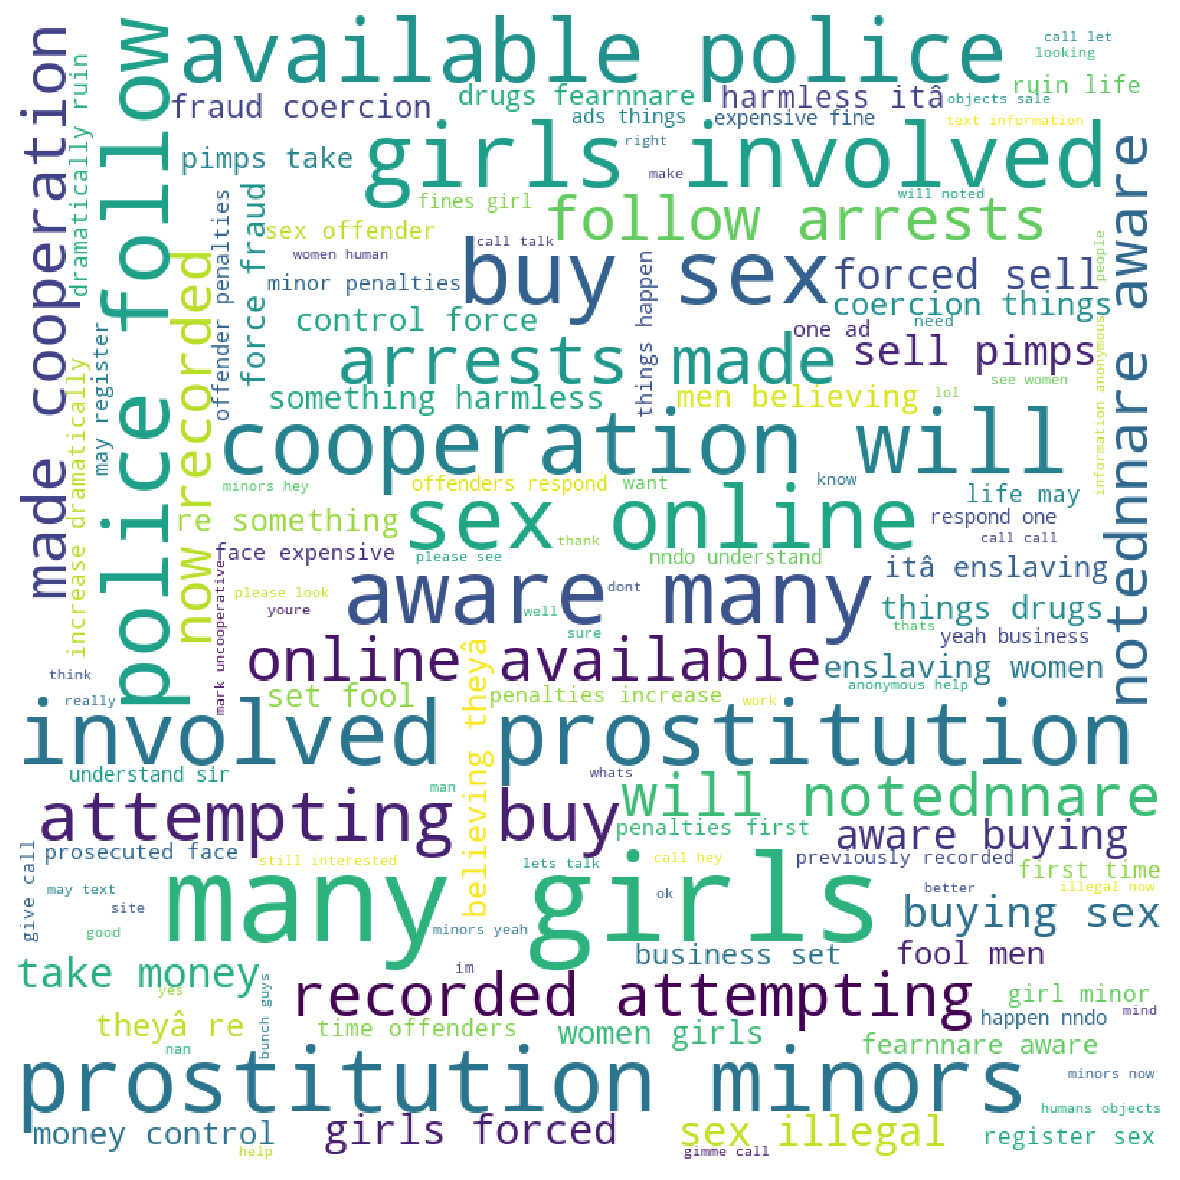

In [633]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

  
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df2['AnyText']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [636]:
from collections import Counter
Counter(df2["AnyText"]).most_common(20)

[('Your  is now recorded attempting to buy sex online and is available for police follow up Arrests have been made Cooperation will be notednnAre you aware that many of the girls who get involved in prostitution are minors',
  1546),
 (nan, 559),
 ('Yeah the business is set up to fool men into believing theyâ€™re doing something harmless but itâ€™s enslaving women These girls are forced to sell themselves by pimps who take 100 of the money and control them with force fraud coercion and things like drugs and fearnnAre you aware that buying sex is illegal',
  477),
 ('If you are prosecuted you face expensive fines If the girl is a minor the penalties increase dramatically and can ruin your life You may also have to register as a Sex Offender These penalties are for first time offenders If you respond to one of these ads again these things could happen to you nnDo you understand sir',
  412),
 ('Your  was previously recorded attempting to buy sex online and is available for police follow 

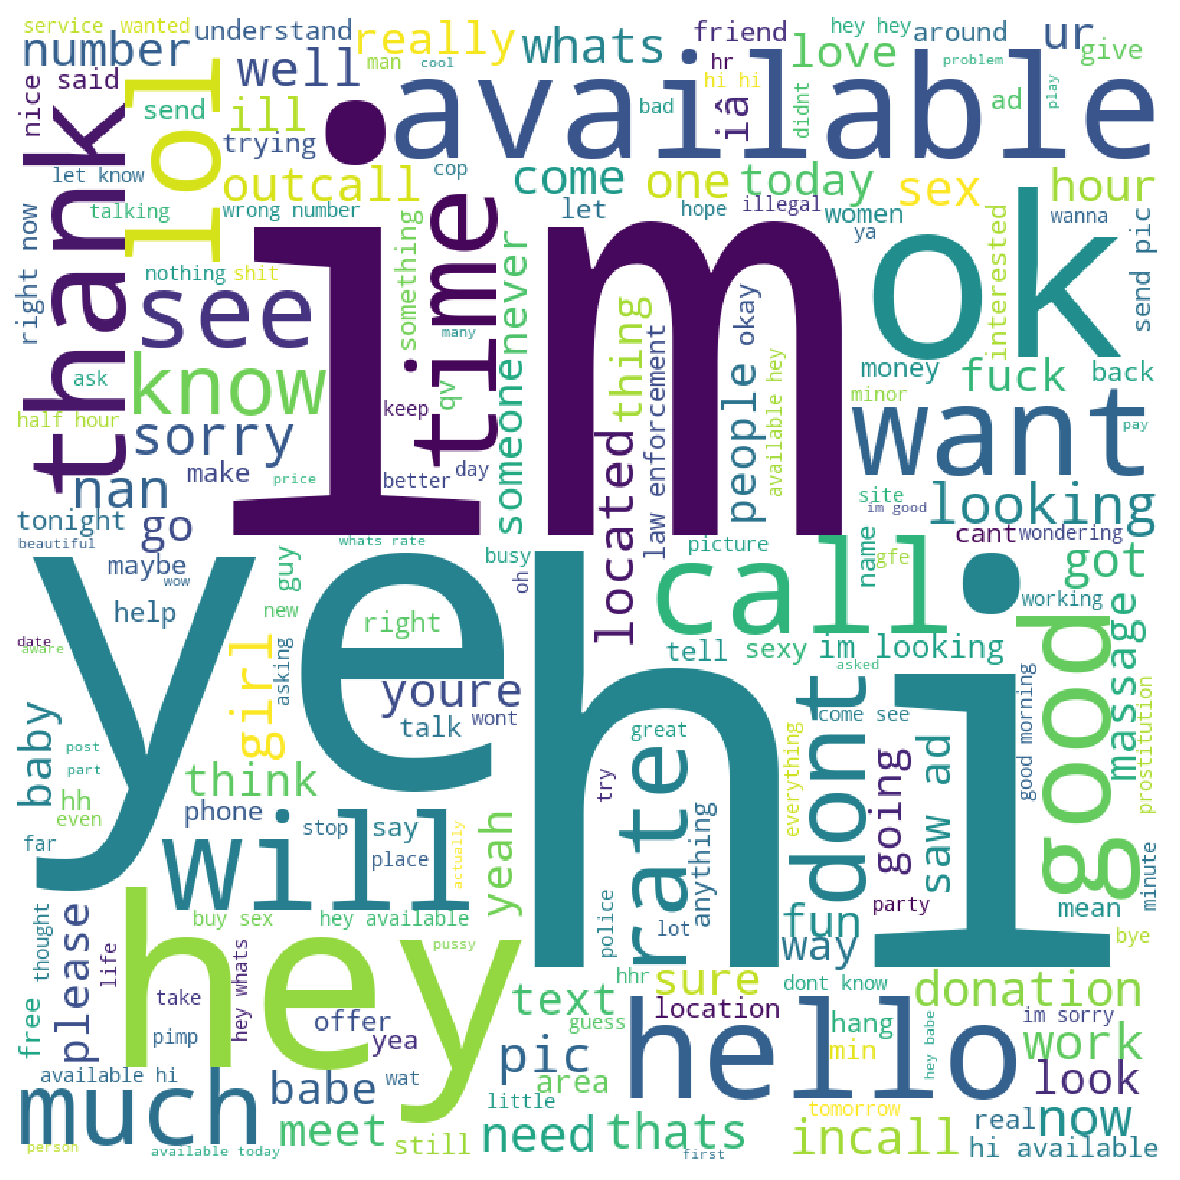

In [634]:
df3=df.loc[df['ParticipantRole']=='Visitor']
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

  
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df3['AnyText']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [638]:
Counter(df3["AnyText"]).most_common(50)

[('Hi', 480),
 ('Hey', 437),
 (nan, 369),
 ('Yes', 320),
 ('Hello', 272),
 ('Ok', 155),
 ('Are you available', 137),
 ('No', 111),
 ('Available', 84),
 ('Yes ', 79),
 ('You available', 51),
 ('How are you', 48),
 ('What', 44),
 ('Yea', 42),
 ('Whats up', 38),
 ('Yeah', 37),
 ('U available', 35),
 ('Sure', 35),
 ('Hh', 35),
 ('How much', 35),
 ('Lol', 35),
 ('Rates', 34),
 ('In', 34),
 ('Hi there', 32),
 ('Where are you located', 32),
 ('Qv', 32),
 ('Hola', 30),
 ('Bye', 28),
 ('Hey are you available', 28),
 ('hi', 28),
 ('Huh', 28),
 ('Incall', 27),
 ('Outcall', 27),
 ('What are your rates', 26),
 ('Ok ', 26),
 ('Out', 25),
 ('Thank you', 24),
 ('Hey whats up', 24),
 ('Thanks', 23),
 ('Yeah ', 22),
 ('Who is this', 21),
 ('Hey baby', 21),
 ('K', 20),
 ('Hey there', 20),
 ('You', 20),
 ('Are u available', 20),
 ('Nope', 19),
 ('Good morning', 19),
 ('Yep', 19),
 ('Sex', 19)]

# Vader Score

In [247]:
df1=pd.read_csv('/Users/n.y.r/Desktop/EPIK/Ready_Sentiment_df.csv')

In [248]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
  
# function to print sentiments 
# of the sentence. 
def sentiment_scores(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    return sentiment_dict['compound']

score=[]
for text in df['AnyText']:
    score.append(sentiment_scores(text))
df1['Vader_Score'] = pd.DataFrame(score)


In [249]:
df1["Conv_Vader"] = df1.groupby(["ConversationId"])["Vader_Score"].transform(sum)
df1["AVG_Vader"] = df1.groupby(["ConversationId"])["Vader_Score"].transform(lambda x: sum(x)/len(x))


In [250]:
a=df1.groupby("ConversationId").apply(lambda x: x[x['ParticipantRole'] == 'Visitor']['Vader_Score'].sum())
b=df1.groupby("ConversationId").apply(lambda x: x[x['ParticipantRole'] == 'Agent']['Vader_Score'].sum())
a=a.rename("Visitor_VaderSc")
a.to_frame()
b=b.rename("Agent_VaderSc")
b.to_frame()
df1=pd.merge(df1,a, on=['ConversationId'])
df1=pd.merge(df1,b,on=['ConversationId'])
df1.head(20)

,Unnamed: 0,ConversationId,ConversationDurationMilliseconds,ParticipantRole,Abandoned,AnyText,ConversationEndedBy,ConversationEndedCategory,Buyer City,Purchase Attempt Number,...,Visitor_ConvLen,Agent_ConvLen,y_4classes,y_2classes,Total_VistorWait,Vader_Score,Conv_Vader,AVG_Vader,Visitor_VaderSc,Agent_VaderSc
0,0,57e6f59d37da7adc1d231297,1057905,Visitor,1,Hey Rachel lets play babe,SYSTEM,Timeout,Portland,1,...,37,13,3,1,153593.0,0.3400,0.2373,0.059325,0.2373,0.0000
1,1,57e6f59d37da7adc1d231297,1057905,Visitor,1,Whatever,SYSTEM,Timeout,Portland,1,...,37,13,3,1,153593.0,0.0000,0.2373,0.059325,0.2373,0.0000
2,2,57e6f59d37da7adc1d231297,1057905,Agent,1,Gimme a call,SYSTEM,Timeout,Portland,1,...,37,13,3,1,153593.0,0.0000,0.2373,0.059325,0.2373,0.0000
3,3,57e6f59d37da7adc1d231297,1057905,Visitor,1,Nah,SYSTEM,Timeout,Portland,1,...,37,13,3,1,153593.0,-0.1027,0.2373,0.059325,0.2373,0.0000
4,4,57e6f6ec37da7adc1d2319c7,963694,Visitor,1,Hello I saw your ad and was wondering if you d...,SYSTEM,Timeout,San Diego,1,...,140,0,3,1,0.0,0.0000,0.2023,0.067433,0.2023,0.0000
5,5,57e6f6ec37da7adc1d2319c7,963694,Visitor,1,I didnt know,SYSTEM,Timeout,San Diego,1,...,140,0,3,1,0.0,0.0000,0.2023,0.067433,0.2023,0.0000
6,6,57e6f6ec37da7adc1d2319c7,963694,Visitor,1,This was a joke made on my friends phone I did...,SYSTEM,Timeout,San Diego,1,...,140,0,3,1,0.0,0.2023,0.2023,0.067433,0.2023,0.0000
7,7,57e6fccd37da7adc1d2330f9,1549999,Visitor,1,Just noticed your posting on BP Will you be av...,SYSTEM,Timeout,San Diego,1,...,616,262,0,0,255818.0,0.6249,0.0379,0.004738,0.6063,-0.5684
8,8,57e6fccd37da7adc1d2330f9,1549999,Agent,1,your is on file with law enforcement arrests ...,SYSTEM,Timeout,San Diego,1,...,616,262,0,0,255818.0,-0.4404,0.0379,0.004738,0.6063,-0.5684
9,9,57e6fccd37da7adc1d2330f9,1549999,Agent,1,Are you aware that many of the girls who get i...,SYSTEM,Timeout,San Diego,1,...,616,262,0,0,255818.0,0.0000,0.0379,0.004738,0.6063,-0.5684


In [251]:
df1=df1.drop(columns=['Vader_Score'])
df1.head(10)

,Unnamed: 0,ConversationId,ConversationDurationMilliseconds,ParticipantRole,Abandoned,AnyText,ConversationEndedBy,ConversationEndedCategory,Buyer City,Purchase Attempt Number,Conversation_Length,Visitor_ConvLen,Agent_ConvLen,y_4classes,y_2classes,Total_VistorWait,Conv_Vader,AVG_Vader,Visitor_VaderSc,Agent_VaderSc
0,0,57e6f59d37da7adc1d231297,1057905,Visitor,1,Hey Rachel lets play babe,SYSTEM,Timeout,Portland,1,50,37,13,3,1,153593.0,0.2373,0.059325,0.2373,0.0000
1,1,57e6f59d37da7adc1d231297,1057905,Visitor,1,Whatever,SYSTEM,Timeout,Portland,1,50,37,13,3,1,153593.0,0.2373,0.059325,0.2373,0.0000
2,2,57e6f59d37da7adc1d231297,1057905,Agent,1,Gimme a call,SYSTEM,Timeout,Portland,1,50,37,13,3,1,153593.0,0.2373,0.059325,0.2373,0.0000
3,3,57e6f59d37da7adc1d231297,1057905,Visitor,1,Nah,SYSTEM,Timeout,Portland,1,50,37,13,3,1,153593.0,0.2373,0.059325,0.2373,0.0000
4,4,57e6f6ec37da7adc1d2319c7,963694,Visitor,1,Hello I saw your ad and was wondering if you d...,SYSTEM,Timeout,San Diego,1,140,140,0,3,1,0.0,0.2023,0.067433,0.2023,0.0000
5,5,57e6f6ec37da7adc1d2319c7,963694,Visitor,1,I didnt know,SYSTEM,Timeout,San Diego,1,140,140,0,3,1,0.0,0.2023,0.067433,0.2023,0.0000
6,6,57e6f6ec37da7adc1d2319c7,963694,Visitor,1,This was a joke made on my friends phone I did...,SYSTEM,Timeout,San Diego,1,140,140,0,3,1,0.0,0.2023,0.067433,0.2023,0.0000
7,7,57e6fccd37da7adc1d2330f9,1549999,Visitor,1,Just noticed your posting on BP Will you be av...,SYSTEM,Timeout,San Diego,1,878,616,262,0,0,255818.0,0.0379,0.004738,0.6063,-0.5684
8,8,57e6fccd37da7adc1d2330f9,1549999,Agent,1,your is on file with law enforcement arrests ...,SYSTEM,Timeout,San Diego,1,878,616,262,0,0,255818.0,0.0379,0.004738,0.6063,-0.5684
9,9,57e6fccd37da7adc1d2330f9,1549999,Agent,1,Are you aware that many of the girls who get i...,SYSTEM,Timeout,San Diego,1,878,616,262,0,0,255818.0,0.0379,0.004738,0.6063,-0.5684


In [252]:
df1=df1.drop(columns=['Unnamed: 0'])

In [253]:
df1.to_csv('/Users/n.y.r/Desktop/EPIK/Vader_NoGroup.csv')

In [254]:
df1=df1.groupby('ConversationId').first()
df1=df1.drop(columns=['ParticipantRole','AnyText'])
df1.head(10)

,ConversationDurationMilliseconds,Abandoned,ConversationEndedBy,ConversationEndedCategory,Buyer City,Purchase Attempt Number,Conversation_Length,Visitor_ConvLen,Agent_ConvLen,y_4classes,y_2classes,Total_VistorWait,Conv_Vader,AVG_Vader,Visitor_VaderSc,Agent_VaderSc
ConversationId,,,,,,,,,,,,,,,,
57e6f59d37da7adc1d231297,1057905,1,SYSTEM,Timeout,Portland,1,50,37,13,3,1,153593.0,0.2373,0.059325,0.2373,0.0000
57e6f6ec37da7adc1d2319c7,963694,1,SYSTEM,Timeout,San Diego,1,140,140,0,3,1,0.0,0.2023,0.067433,0.2023,0.0000
57e6fccd37da7adc1d2330f9,1549999,1,SYSTEM,Timeout,San Diego,1,878,616,262,0,0,255818.0,0.0379,0.004738,0.6063,-0.5684
57ed978dde2423527a65f2f4,10900309,1,SYSTEM,Timeout,Portland,1,247,28,219,3,1,93603.0,-0.4404,-0.220200,0.0000,-0.4404
57ed9827de2423527a65f71f,11439650,1,SYSTEM,Timeout,San Diego,1,241,22,219,3,1,638654.0,0.0863,0.043150,0.5267,-0.4404
57ed9830de2423527a65f7a7,10918187,1,SYSTEM,Timeout,San Diego,1,241,22,219,3,1,110331.0,0.0863,0.043150,0.5267,-0.4404
57ed983ede2423527a65f9cb,10843622,1,SYSTEM,Timeout,Portland,2,140,3,137,3,1,33954.0,-0.4404,-0.220200,0.0000,-0.4404
57ed989ade2423527a65fe99,12154930,1,SYSTEM,Timeout,Portland,1,2344,1414,930,3,1,805846.0,-0.4623,-0.024332,3.0377,-3.5000
57ed98d5de2423527a66052d,10889843,1,SYSTEM,Timeout,Portland,1,361,224,137,3,1,83874.0,0.2780,0.139000,0.7184,-0.4404


# Textblob Score

In [277]:
df2=pd.read_csv('/Users/n.y.r/Desktop/EPIK/Ready_Sentiment_df.csv')

In [278]:
from textblob import TextBlob
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

df2['Textblob_Polarity'] = df2['AnyText'].apply(sentiment_calc)

In [279]:
from textblob import TextBlob
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment.subjectivity
    except:
        return None

df2['Textblob_Subjectivity'] = df2['AnyText'].apply(sentiment_calc)

In [280]:
df2.head(20)

,Unnamed: 0,ConversationId,ConversationDurationMilliseconds,ParticipantRole,Abandoned,AnyText,ConversationEndedBy,ConversationEndedCategory,Buyer City,Purchase Attempt Number,Conversation_Length,Visitor_ConvLen,Agent_ConvLen,y_4classes,y_2classes,Total_VistorWait,Textblob_Polarity,Textblob_Subjectivity
0,0,57e6f59d37da7adc1d231297,1057905,Visitor,1,Hey Rachel lets play babe,SYSTEM,Timeout,Portland,1,50,37,13,3,1,153593.0,0.000000,0.000000
1,1,57e6f59d37da7adc1d231297,1057905,Visitor,1,Whatever,SYSTEM,Timeout,Portland,1,50,37,13,3,1,153593.0,0.000000,0.000000
2,2,57e6f59d37da7adc1d231297,1057905,Agent,1,Gimme a call,SYSTEM,Timeout,Portland,1,50,37,13,3,1,153593.0,0.000000,0.000000
3,3,57e6f59d37da7adc1d231297,1057905,Visitor,1,Nah,SYSTEM,Timeout,Portland,1,50,37,13,3,1,153593.0,0.000000,0.000000
4,4,57e6f6ec37da7adc1d2319c7,963694,Visitor,1,Hello I saw your ad and was wondering if you d...,SYSTEM,Timeout,San Diego,1,140,140,0,3,1,0.0,0.000000,0.000000
5,5,57e6f6ec37da7adc1d2319c7,963694,Visitor,1,I didnt know,SYSTEM,Timeout,San Diego,1,140,140,0,3,1,0.0,0.000000,0.000000
6,6,57e6f6ec37da7adc1d2319c7,963694,Visitor,1,This was a joke made on my friends phone I did...,SYSTEM,Timeout,San Diego,1,140,140,0,3,1,0.0,-0.506250,0.677083
7,7,57e6fccd37da7adc1d2330f9,1549999,Visitor,1,Just noticed your posting on BP Will you be av...,SYSTEM,Timeout,San Diego,1,878,616,262,0,0,255818.0,0.180000,0.180000
8,8,57e6fccd37da7adc1d2330f9,1549999,Agent,1,your is on file with law enforcement arrests ...,SYSTEM,Timeout,San Diego,1,878,616,262,0,0,255818.0,0.000000,0.000000
9,9,57e6fccd37da7adc1d2330f9,1549999,Agent,1,Are you aware that many of the girls who get i...,SYSTEM,Timeout,San Diego,1,878,616,262,0,0,255818.0,0.375000,0.375000


In [281]:
df2["Conv_Textblob_Pol"] = df2.groupby(["ConversationId"])["Textblob_Polarity"].transform(sum)
df2["AVG_Textblob_Pol"] = df2.groupby(["ConversationId"])["Textblob_Polarity"].transform(lambda x: sum(x)/len(x))
df2["Conv_Textblob_Sub"] = df2.groupby(["ConversationId"])["Textblob_Subjectivity"].transform(sum)
df2["AVG_Textblob_Sub"] = df2.groupby(["ConversationId"])["Textblob_Subjectivity"].transform(lambda x: sum(x)/len(x))
df2.head(20)

,Unnamed: 0,ConversationId,ConversationDurationMilliseconds,ParticipantRole,Abandoned,AnyText,ConversationEndedBy,ConversationEndedCategory,Buyer City,Purchase Attempt Number,...,Agent_ConvLen,y_4classes,y_2classes,Total_VistorWait,Textblob_Polarity,Textblob_Subjectivity,Conv_Textblob_Pol,AVG_Textblob_Pol,Conv_Textblob_Sub,AVG_Textblob_Sub
0,0,57e6f59d37da7adc1d231297,1057905,Visitor,1,Hey Rachel lets play babe,SYSTEM,Timeout,Portland,1,...,13,3,1,153593.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,57e6f59d37da7adc1d231297,1057905,Visitor,1,Whatever,SYSTEM,Timeout,Portland,1,...,13,3,1,153593.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,57e6f59d37da7adc1d231297,1057905,Agent,1,Gimme a call,SYSTEM,Timeout,Portland,1,...,13,3,1,153593.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,57e6f59d37da7adc1d231297,1057905,Visitor,1,Nah,SYSTEM,Timeout,Portland,1,...,13,3,1,153593.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,57e6f6ec37da7adc1d2319c7,963694,Visitor,1,Hello I saw your ad and was wondering if you d...,SYSTEM,Timeout,San Diego,1,...,0,3,1,0.0,0.000000,0.000000,-0.506250,-0.168750,0.677083,0.225694
5,5,57e6f6ec37da7adc1d2319c7,963694,Visitor,1,I didnt know,SYSTEM,Timeout,San Diego,1,...,0,3,1,0.0,0.000000,0.000000,-0.506250,-0.168750,0.677083,0.225694
6,6,57e6f6ec37da7adc1d2319c7,963694,Visitor,1,This was a joke made on my friends phone I did...,SYSTEM,Timeout,San Diego,1,...,0,3,1,0.0,-0.506250,0.677083,-0.506250,-0.168750,0.677083,0.225694
7,7,57e6fccd37da7adc1d2330f9,1549999,Visitor,1,Just noticed your posting on BP Will you be av...,SYSTEM,Timeout,San Diego,1,...,262,0,0,255818.0,0.180000,0.180000,-0.672778,-0.084097,2.999444,0.374931
8,8,57e6fccd37da7adc1d2330f9,1549999,Agent,1,your is on file with law enforcement arrests ...,SYSTEM,Timeout,San Diego,1,...,262,0,0,255818.0,0.000000,0.000000,-0.672778,-0.084097,2.999444,0.374931
9,9,57e6fccd37da7adc1d2330f9,1549999,Agent,1,Are you aware that many of the girls who get i...,SYSTEM,Timeout,San Diego,1,...,262,0,0,255818.0,0.375000,0.375000,-0.672778,-0.084097,2.999444,0.374931


In [282]:
a=df2.groupby("ConversationId").apply(lambda x: x[x['ParticipantRole'] == 'Visitor']['Textblob_Polarity'].sum())
b=df2.groupby("ConversationId").apply(lambda x: x[x['ParticipantRole'] == 'Agent']['Textblob_Polarity'].sum())
a=a.rename("Visitor_Textblob_Polarity")
a.to_frame()
b=b.rename("Agent_Textblob_Polarity")
b.to_frame()
df2=pd.merge(df2,a, on=['ConversationId'])
df2=pd.merge(df2,b,on=['ConversationId'])
df2.tail(20)

,Unnamed: 0,ConversationId,ConversationDurationMilliseconds,ParticipantRole,Abandoned,AnyText,ConversationEndedBy,ConversationEndedCategory,Buyer City,Purchase Attempt Number,...,y_2classes,Total_VistorWait,Textblob_Polarity,Textblob_Subjectivity,Conv_Textblob_Pol,AVG_Textblob_Pol,Conv_Textblob_Sub,AVG_Textblob_Sub,Visitor_Textblob_Polarity,Agent_Textblob_Polarity
48082,48082,5dc74bd04b553924b413b97c,65688070,Visitor,1,Wow how much,SYSTEM,Timeout,Dallas,3,...,1,1803570.0,0.150000,0.600000,0.250,0.0625,0.90,0.225,0.150,0.1
48083,48083,5dc74bd04b553924b413b97c,65688070,Visitor,1,Tonight,SYSTEM,Timeout,Dallas,3,...,1,1803570.0,0.000000,0.000000,0.250,0.0625,0.90,0.225,0.150,0.1
48084,48084,5dc74bd04b553924b413b97c,65688070,Visitor,1,Hello,SYSTEM,Timeout,Dallas,3,...,1,1803570.0,0.000000,0.000000,0.250,0.0625,0.90,0.225,0.150,0.1
48085,48085,5dc74f964b553924b413bdec,883166,Visitor,0,Hello,Agent,Ended,Phoenix,1,...,1,472136.0,0.000000,0.000000,2.875,NaN,3.95,NaN,1.975,0.9
48086,48086,5dc74f964b553924b413bdec,883166,Agent,0,hey yourselfu lookin 4 gia,Agent,Ended,Phoenix,1,...,1,472136.0,0.000000,0.000000,2.875,NaN,3.95,NaN,1.975,0.9
48087,48087,5dc74f964b553924b413bdec,883166,Visitor,0,Yes I am,Agent,Ended,Phoenix,1,...,1,472136.0,0.000000,0.000000,2.875,NaN,3.95,NaN,1.975,0.9
48088,48088,5dc74f964b553924b413bdec,883166,Agent,0,whatcha lookin 4 and vwhere,Agent,Ended,Phoenix,1,...,1,472136.0,0.000000,0.000000,2.875,NaN,3.95,NaN,1.975,0.9
48089,48089,5dc74f964b553924b413bdec,883166,Visitor,0,Im looking for someone willing to have my baby...,Agent,Ended,Phoenix,1,...,1,472136.0,0.525000,0.750000,2.875,NaN,3.95,NaN,1.975,0.9
48090,48090,5dc74f964b553924b413bdec,883166,Agent,0,wowserious,Agent,Ended,Phoenix,1,...,1,472136.0,0.000000,0.000000,2.875,NaN,3.95,NaN,1.975,0.9
48091,48091,5dc74f964b553924b413bdec,883166,Visitor,0,1,Agent,Ended,Phoenix,1,...,1,472136.0,0.000000,0.000000,2.875,NaN,3.95,NaN,1.975,0.9


In [283]:
a=df2.groupby("ConversationId").apply(lambda x: x[x['ParticipantRole'] == 'Visitor']['Textblob_Subjectivity'].sum())
b=df2.groupby("ConversationId").apply(lambda x: x[x['ParticipantRole'] == 'Agent']['Textblob_Subjectivity'].sum())
a=a.rename("Visitor_Textblob_Subjectivity")
a.to_frame()
b=b.rename("Agent_Textblob_Subjectivity")
b.to_frame()
df2=pd.merge(df2,a, on=['ConversationId'])
df2=pd.merge(df2,b,on=['ConversationId'])
df2.tail(20)

,Unnamed: 0,ConversationId,ConversationDurationMilliseconds,ParticipantRole,Abandoned,AnyText,ConversationEndedBy,ConversationEndedCategory,Buyer City,Purchase Attempt Number,...,Textblob_Polarity,Textblob_Subjectivity,Conv_Textblob_Pol,AVG_Textblob_Pol,Conv_Textblob_Sub,AVG_Textblob_Sub,Visitor_Textblob_Polarity,Agent_Textblob_Polarity,Visitor_Textblob_Subjectivity,Agent_Textblob_Subjectivity
48082,48082,5dc74bd04b553924b413b97c,65688070,Visitor,1,Wow how much,SYSTEM,Timeout,Dallas,3,...,0.150000,0.600000,0.250,0.0625,0.90,0.225,0.150,0.1,0.60,0.3
48083,48083,5dc74bd04b553924b413b97c,65688070,Visitor,1,Tonight,SYSTEM,Timeout,Dallas,3,...,0.000000,0.000000,0.250,0.0625,0.90,0.225,0.150,0.1,0.60,0.3
48084,48084,5dc74bd04b553924b413b97c,65688070,Visitor,1,Hello,SYSTEM,Timeout,Dallas,3,...,0.000000,0.000000,0.250,0.0625,0.90,0.225,0.150,0.1,0.60,0.3
48085,48085,5dc74f964b553924b413bdec,883166,Visitor,0,Hello,Agent,Ended,Phoenix,1,...,0.000000,0.000000,2.875,NaN,3.95,NaN,1.975,0.9,2.65,1.3
48086,48086,5dc74f964b553924b413bdec,883166,Agent,0,hey yourselfu lookin 4 gia,Agent,Ended,Phoenix,1,...,0.000000,0.000000,2.875,NaN,3.95,NaN,1.975,0.9,2.65,1.3
48087,48087,5dc74f964b553924b413bdec,883166,Visitor,0,Yes I am,Agent,Ended,Phoenix,1,...,0.000000,0.000000,2.875,NaN,3.95,NaN,1.975,0.9,2.65,1.3
48088,48088,5dc74f964b553924b413bdec,883166,Agent,0,whatcha lookin 4 and vwhere,Agent,Ended,Phoenix,1,...,0.000000,0.000000,2.875,NaN,3.95,NaN,1.975,0.9,2.65,1.3
48089,48089,5dc74f964b553924b413bdec,883166,Visitor,0,Im looking for someone willing to have my baby...,Agent,Ended,Phoenix,1,...,0.525000,0.750000,2.875,NaN,3.95,NaN,1.975,0.9,2.65,1.3
48090,48090,5dc74f964b553924b413bdec,883166,Agent,0,wowserious,Agent,Ended,Phoenix,1,...,0.000000,0.000000,2.875,NaN,3.95,NaN,1.975,0.9,2.65,1.3
48091,48091,5dc74f964b553924b413bdec,883166,Visitor,0,1,Agent,Ended,Phoenix,1,...,0.000000,0.000000,2.875,NaN,3.95,NaN,1.975,0.9,2.65,1.3


In [284]:
df2=df2.drop(columns=['Unnamed: 0','Textblob_Polarity','Textblob_Subjectivity'])
df2.to_csv('/Users/n.y.r/Desktop/EPIK/Textblob_NoGroup.csv')

In [285]:
df2=df2.drop(columns=['ParticipantRole','AnyText'])

In [286]:

df2=df2.groupby('ConversationId').first()

In [287]:
df2.head(20)

,ConversationDurationMilliseconds,Abandoned,ConversationEndedBy,ConversationEndedCategory,Buyer City,Purchase Attempt Number,Conversation_Length,Visitor_ConvLen,Agent_ConvLen,y_4classes,y_2classes,Total_VistorWait,Conv_Textblob_Pol,AVG_Textblob_Pol,Conv_Textblob_Sub,AVG_Textblob_Sub,Visitor_Textblob_Polarity,Agent_Textblob_Polarity,Visitor_Textblob_Subjectivity,Agent_Textblob_Subjectivity
ConversationId,,,,,,,,,,,,,,,,,,,,
57e6f59d37da7adc1d231297,1057905,1,SYSTEM,Timeout,Portland,1,50,37,13,3,1,153593.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
57e6f6ec37da7adc1d2319c7,963694,1,SYSTEM,Timeout,San Diego,1,140,140,0,3,1,0.0,-0.506250,-0.168750,0.677083,0.225694,-0.506250,0.000000,0.677083,0.000000
57e6fccd37da7adc1d2330f9,1549999,1,SYSTEM,Timeout,San Diego,1,878,616,262,0,0,255818.0,-0.672778,-0.084097,2.999444,0.374931,-0.747778,0.075000,2.424444,0.575000
57ed978dde2423527a65f2f4,10900309,1,SYSTEM,Timeout,Portland,1,247,28,219,3,1,93603.0,0.227778,0.113889,0.672222,0.336111,-0.155556,0.383333,0.288889,0.383333
57ed9827de2423527a65f71f,11439650,1,SYSTEM,Timeout,San Diego,1,241,22,219,3,1,638654.0,0.733333,0.366667,0.983333,0.491667,0.350000,0.383333,0.600000,0.383333
57ed9830de2423527a65f7a7,10918187,1,SYSTEM,Timeout,San Diego,1,241,22,219,3,1,110331.0,0.733333,0.366667,0.983333,0.491667,0.350000,0.383333,0.600000,0.383333
57ed983ede2423527a65f9cb,10843622,1,SYSTEM,Timeout,Portland,2,140,3,137,3,1,33954.0,0.400000,0.200000,0.400000,0.200000,0.000000,0.400000,0.000000,0.400000
57ed989ade2423527a65fe99,12154930,1,SYSTEM,Timeout,Portland,1,2344,1414,930,3,1,805846.0,1.973899,0.103889,7.723125,0.406480,2.023899,-0.050000,5.631458,2.091667
57ed98d5de2423527a66052d,10889843,1,SYSTEM,Timeout,Portland,1,361,224,137,3,1,83874.0,0.400000,0.200000,1.400000,0.700000,0.000000,0.400000,1.000000,0.400000


In [288]:
df2.to_csv('/Users/n.y.r/Desktop/EPIK/Textblob_df.csv')

# Textblob + Vader

In [289]:
cols_to_use = df2.columns.difference(df1.columns)
dfNew = pd.merge(df1, df2[cols_to_use], left_index=True, right_index=True, how='outer')
dfNew.head(10)
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5744 entries, 57e6f59d37da7adc1d231297 to 5dc74f964b553924b413bdec
Data columns (total 24 columns):
ConversationDurationMilliseconds    5744 non-null int64
Abandoned                           5744 non-null int64
ConversationEndedBy                 5744 non-null object
ConversationEndedCategory           5741 non-null object
Buyer City                          5744 non-null object
Purchase Attempt Number             5744 non-null int64
Conversation_Length                 5744 non-null int64
Visitor_ConvLen                     5744 non-null int64
Agent_ConvLen                       5744 non-null int64
y_4classes                          5744 non-null int64
y_2classes                          5744 non-null int64
Total_VistorWait                    5744 non-null float64
Conv_Vader                          5744 non-null float64
AVG_Vader                           5744 non-null float64
Visitor_VaderSc                     5744 non-null float64
Agen

In [290]:
dfNew.to_csv('/Users/n.y.r/Desktop/EPIK/Combo_Sentiment.csv')

# Prepare for Training

In [268]:
vader_df=pd.read_csv('/Users/n.y.r/Desktop/EPIK/Vader_df.csv')
vader_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5744 entries, 0 to 5743
Data columns (total 17 columns):
ConversationId                      5744 non-null object
ConversationDurationMilliseconds    5744 non-null int64
Abandoned                           5744 non-null int64
ConversationEndedBy                 5744 non-null object
ConversationEndedCategory           5741 non-null object
Buyer City                          5744 non-null object
Purchase Attempt Number             5744 non-null int64
Conversation_Length                 5744 non-null int64
Visitor_ConvLen                     5744 non-null int64
Agent_ConvLen                       5744 non-null int64
y_4classes                          5744 non-null int64
y_2classes                          5744 non-null int64
Total_VistorWait                    5744 non-null float64
Conv_Vader                          5744 non-null float64
AVG_Vader                           5744 non-null float64
Visitor_VaderSc                     5744 no

In [ ]:
Textblob_df=pd.read_csv('/Users/n.y.r/Desktop/EPIK/Textblob_df.csv')
combo_df=pd.read_csv('/Users/n.y.r/Desktop/EPIK/Combo_Sentiment.csv')
Textblob_df=pd.get_dummies(Textblob_df, columns=['ConversationEndedBy','Buyer City','ConversationEndedCategory'])
combo_df=pd.get_dummies(combo_df, columns=['ConversationEndedBy','Buyer City','ConversationEndedCategory'])
Textblob_df=Textblob_df.drop(columns=['ConversationId'])
combo_df=combo_df.drop(columns=['ConversationId'])

In [292]:
vader_df=pd.get_dummies(vader_df, columns=['ConversationEndedBy','Buyer City','ConversationEndedCategory'])
vader_df.head(20)

,ConversationId,ConversationDurationMilliseconds,Abandoned,Purchase Attempt Number,Conversation_Length,Visitor_ConvLen,Agent_ConvLen,y_4classes,y_2classes,Total_VistorWait,...,Buyer City_New York,Buyer City_Oakland,Buyer City_Phoenix,Buyer City_Portland,Buyer City_San Diego,Buyer City_Tucson,ConversationEndedCategory_Disconnected,ConversationEndedCategory_Ended,ConversationEndedCategory_OptOut,ConversationEndedCategory_Timeout
0,57e6f59d37da7adc1d231297,1057905,1,1,50,37,13,3,1,153593.0,...,0,0,0,1,0,0,0,0,0,1
1,57e6f6ec37da7adc1d2319c7,963694,1,1,140,140,0,3,1,0.0,...,0,0,0,0,1,0,0,0,0,1
2,57e6fccd37da7adc1d2330f9,1549999,1,1,878,616,262,0,0,255818.0,...,0,0,0,0,1,0,0,0,0,1
3,57ed978dde2423527a65f2f4,10900309,1,1,247,28,219,3,1,93603.0,...,0,0,0,1,0,0,0,0,0,1
4,57ed9827de2423527a65f71f,11439650,1,1,241,22,219,3,1,638654.0,...,0,0,0,0,1,0,0,0,0,1
5,57ed9830de2423527a65f7a7,10918187,1,1,241,22,219,3,1,110331.0,...,0,0,0,0,1,0,0,0,0,1
6,57ed983ede2423527a65f9cb,10843622,1,2,140,3,137,3,1,33954.0,...,0,0,0,1,0,0,0,0,0,1
7,57ed989ade2423527a65fe99,12154930,1,1,2344,1414,930,3,1,805846.0,...,0,0,0,1,0,0,0,0,0,1
8,57ed98d5de2423527a66052d,10889843,1,1,361,224,137,3,1,83874.0,...,0,0,0,1,0,0,0,0,0,1
9,57ed9932de2423527a660a53,11113319,1,4,348,61,287,0,0,172542.0,...,0,0,0,0,0,0,0,0,0,1


In [294]:
vader_df=vader_df.drop(columns=['ConversationId'])
vader_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5744 entries, 0 to 5743
Data columns (total 41 columns):
ConversationDurationMilliseconds          5744 non-null int64
Abandoned                                 5744 non-null int64
Purchase Attempt Number                   5744 non-null int64
Conversation_Length                       5744 non-null int64
Visitor_ConvLen                           5744 non-null int64
Agent_ConvLen                             5744 non-null int64
y_4classes                                5744 non-null int64
y_2classes                                5744 non-null int64
Total_VistorWait                          5744 non-null float64
Conv_Vader                                5744 non-null float64
AVG_Vader                                 5744 non-null float64
Visitor_VaderSc                           5744 non-null float64
Agent_VaderSc_y                           5744 non-null float64
ConversationEndedBy_2149626571            5744 non-null uint8
ConversationEnd

In [296]:
vader_df.to_csv("/Users/n.y.r/Desktop/EPIK/vader_model.csv")

In [297]:
Textblob_df=pd.read_csv('/Users/n.y.r/Desktop/EPIK/Textblob_df.csv')
combo_df=pd.read_csv('/Users/n.y.r/Desktop/EPIK/Combo_Sentiment.csv')
Textblob_df=pd.get_dummies(Textblob_df, columns=['ConversationEndedBy','Buyer City','ConversationEndedCategory'])
combo_df=pd.get_dummies(combo_df, columns=['ConversationEndedBy','Buyer City','ConversationEndedCategory'])
Textblob_df=Textblob_df.drop(columns=['ConversationId'])
combo_df=combo_df.drop(columns=['ConversationId'])

In [332]:
combo_df=combo_df.fillna(0)
Textblob_df=Textblob_df.fillna(0)

In [333]:
Textblob_df.to_csv("/Users/n.y.r/Desktop/EPIK/Textblob_model.csv")
combo_df.to_csv("/Users/n.y.r/Desktop/EPIK/combo_model.csv")

In [334]:
combo_df.info()
Textblob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5744 entries, 0 to 5743
Data columns (total 49 columns):
ConversationDurationMilliseconds          5744 non-null int64
Abandoned                                 5744 non-null int64
Purchase Attempt Number                   5744 non-null int64
Conversation_Length                       5744 non-null int64
Visitor_ConvLen                           5744 non-null int64
Agent_ConvLen                             5744 non-null int64
y_4classes                                5744 non-null int64
y_2classes                                5744 non-null int64
Total_VistorWait                          5744 non-null float64
Conv_Vader                                5744 non-null float64
AVG_Vader                                 5744 non-null float64
Visitor_VaderSc                           5744 non-null float64
Agent_VaderSc                             5744 non-null float64
AVG_Textblob_Pol                          5744 non-null float64
AVG_Textblob_

## Potential Datasets

In [335]:
X_vader_2 = vader_df.drop(columns=['y_2classes','y_4classes'])
y_vader_2 = vader_df['y_2classes']
X_vader_4 = vader_df.drop(columns=['y_2classes','y_4classes'])
y_vader_4 = vader_df['y_4classes']
X_textblob_2 = Textblob_df.drop(columns=['y_2classes','y_4classes'])
y_textblob_2 = Textblob_df['y_2classes']
X_textblob_4 = Textblob_df.drop(columns=['y_2classes','y_4classes'])
y_textblob_4 = Textblob_df['y_4classes']
X_combo_2 = combo_df.drop(columns=['y_2classes','y_4classes'])
y_combo_2 = combo_df['y_2classes']
X_combo_4 = combo_df.drop(columns=['y_2classes','y_4classes'])
y_combo_4 = combo_df['y_4classes']

In [468]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vader_4, y_vader_4, test_size = 0.20)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform (X_test)
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
trainedsvm=svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print('method:vader+y_4classes')

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
from sklearn.metrics import accuracy_score
print ('Accuracy score:')
print (accuracy_score(y_test, y_pred))

/Users/n.y.r/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


method:vader+y_4classes
[[ 85  17   0 197]
 [ 35  61   0 206]
 [  0   1   0  10]
 [ 71  37   0 429]]
              precision    recall  f1-score   support

           0       0.45      0.28      0.35       299
           1       0.53      0.20      0.29       302
           2       0.00      0.00      0.00        11
           3       0.51      0.80      0.62       537

    accuracy                           0.50      1149
   macro avg       0.37      0.32      0.32      1149
weighted avg       0.49      0.50      0.46      1149

Accuracy score:
0.5004351610095735


/Users/n.y.r/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [469]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_textblob_4, y_textblob_4, test_size = 0.20)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform (X_test)
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
trainedsvm=svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print('method:textblob+y_4classes')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
from sklearn.metrics import accuracy_score
print ('Accuracy score:')
print (accuracy_score(y_test, y_pred))

/Users/n.y.r/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


method:textblob+y_4classes
[[ 73  24   0 195]
 [ 26  72   0 230]
 [  0   2   0   6]
 [ 47  30   0 444]]
              precision    recall  f1-score   support

           0       0.50      0.25      0.33       292
           1       0.56      0.22      0.32       328
           2       0.00      0.00      0.00         8
           3       0.51      0.85      0.64       521

    accuracy                           0.51      1149
   macro avg       0.39      0.33      0.32      1149
weighted avg       0.52      0.51      0.46      1149

Accuracy score:
0.5126196692776327


/Users/n.y.r/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [470]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combo_4, y_combo_4, test_size = 0.20)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform (X_test)
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
trainedsvm=svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print('method:combo+y_4classes')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
from sklearn.metrics import accuracy_score
print ('Accuracy score:')
print (accuracy_score(y_test, y_pred))

/Users/n.y.r/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


method:combo+y_4classes
[[ 81  20   0 180]
 [ 46  64   0 206]
 [  2   1   0   8]
 [ 91  40   0 410]]
              precision    recall  f1-score   support

           0       0.37      0.29      0.32       281
           1       0.51      0.20      0.29       316
           2       0.00      0.00      0.00        11
           3       0.51      0.76      0.61       541

    accuracy                           0.48      1149
   macro avg       0.35      0.31      0.31      1149
weighted avg       0.47      0.48      0.45      1149

Accuracy score:
0.4830287206266319


/Users/n.y.r/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [471]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combo_2, y_combo_2, test_size = 0.20)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform (X_test)
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
trainedsvm=svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print('method:combo+y_4classes')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
from sklearn.metrics import accuracy_score
print ('Accuracy score:')
print (accuracy_score(y_test, y_pred))

/Users/n.y.r/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


method:combo+y_4classes
[[  3 294]
 [  5 847]]
              precision    recall  f1-score   support

           0       0.38      0.01      0.02       297
           1       0.74      0.99      0.85       852

    accuracy                           0.74      1149
   macro avg       0.56      0.50      0.43      1149
weighted avg       0.65      0.74      0.64      1149

Accuracy score:
0.7397737162750218


# Linear Regression

In [307]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

Method:Linear Regression with 4 classes
                                         Coefficient
ConversationEndedCategory_Disconnected  4.023275e-01
ConversationEndedBy_2149626571          2.077317e-01
ConversationEndedBy_SYSTEM              1.870011e-01
ConversationEndedBy_3139481840          1.434126e-01
AVG_Vader                               1.373363e-01
ConversationEndedCategory_OptOut        1.358030e-01
Buyer City_Tucson                       1.056634e-01
Buyer City_Dallas                       1.020196e-01
AVG_Textblob_Pol                        9.942306e-02
Buyer City_New York                     9.243009e-02
Buyer City_Boston                       8.156613e-02
Buyer City_Fort Worth                   7.432799e-02
Abandoned                               7.392820e-02
ConversationEndedCategory_Timeout       7.392819e-02
ConversationEndedBy_Agent               5.119806e-02
ConversationEndedCategory_Ended         5.119806e-02
ConversationEndedBy_8104621637          4.801397e-02
Buyer 

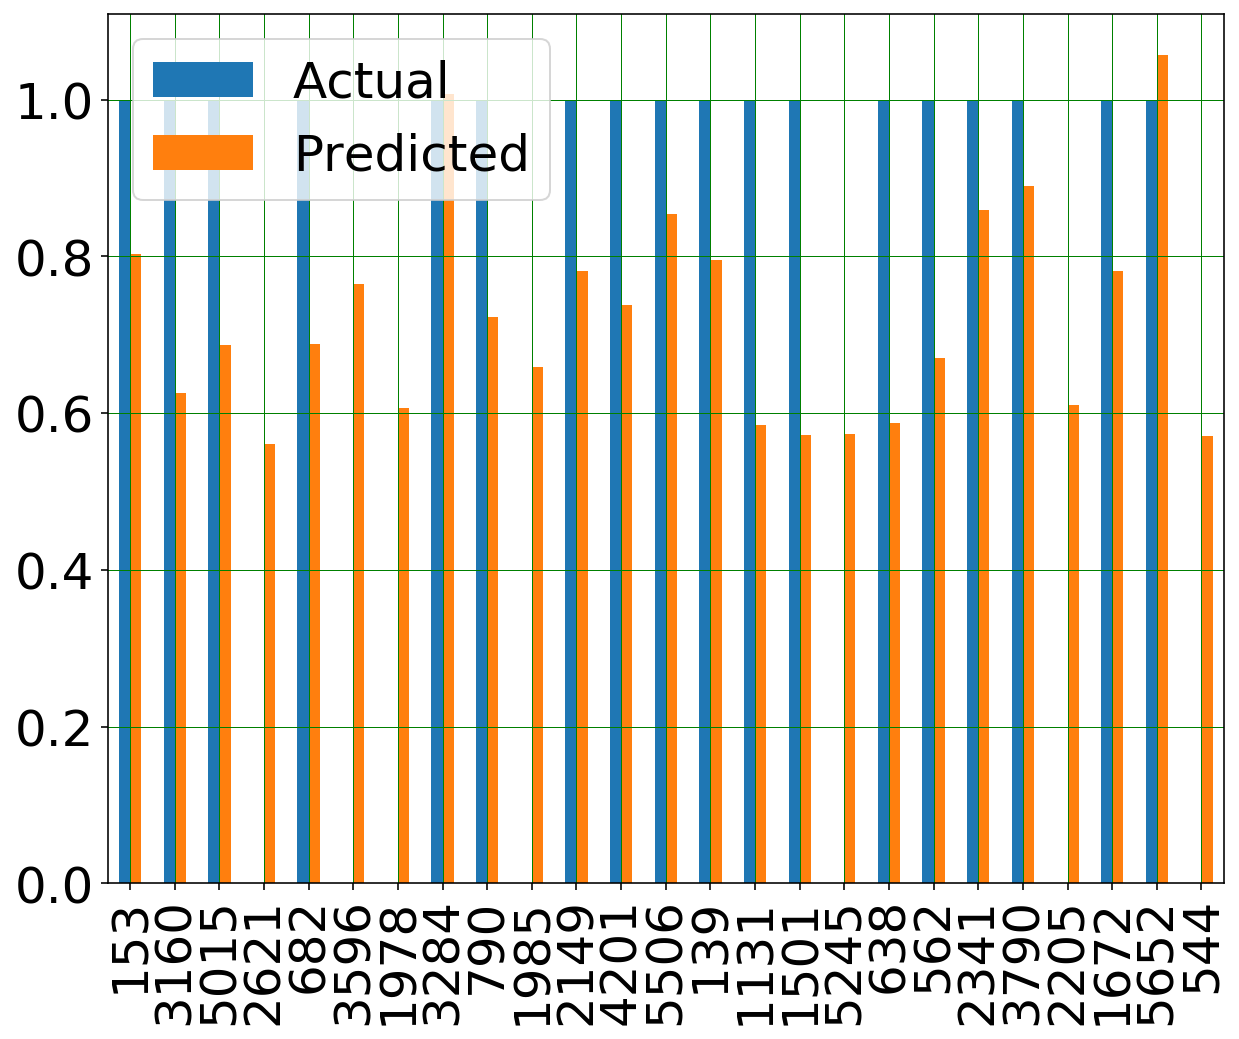

Mean Absolute Error: 0.35414332936684284
Mean Squared Error: 0.17471704876221059
Root Mean Squared Error: 0.41799168503955986


In [580]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combo_2, y_combo_2, test_size = 0.20)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)#training the algorithm
coeff_df = pd.DataFrame(regressor.coef_, X_combo_4.columns, columns=['Coefficient']) 
print('Method:Linear Regression with 4 classes')
#print(coeff_df)
print(coeff_df.abs().sort_values(by=['Coefficient'],ascending=False))
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Method:Linear Regression with 4 classes
                                         Coefficient
ConversationDurationMilliseconds        4.739211e-09
Total_VistorWait                        6.350894e-09
Conversation_Length                     7.560218e-05
Visitor_ConvLen                         3.282353e-04
Agent_ConvLen                           4.038375e-04
Visitor_Textblob_Subjectivity           3.304994e-03
Buyer City_Oakland                      4.278493e-03
Buyer City_San Diego                    1.235812e-02
Buyer City_Foster City                  1.297112e-02
Conv_Textblob_Sub                       1.588835e-02
AVG_Textblob_Sub                        1.687297e-02
ConversationEndedBy_4807580250          1.707327e-02
Agent_Textblob_Subjectivity             1.919335e-02
Conv_Vader                              2.261653e-02
Purchase Attempt Number                 3.157024e-02
Buyer City_Atlanta                      3.525201e-02
AVG_Textblob_Pol                        3.887800e-02
Buyer 

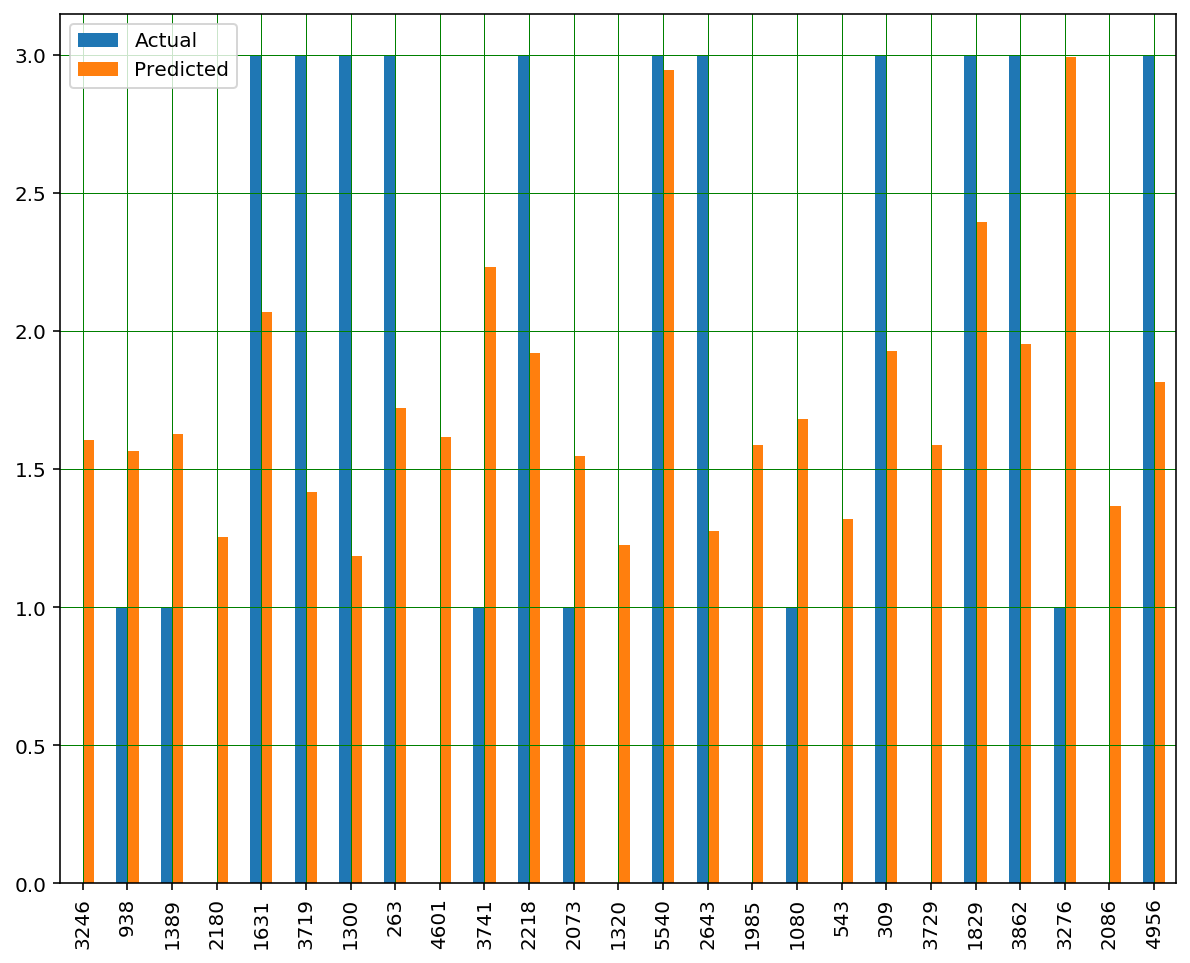

Mean Absolute Error: 1.124567034978721
Mean Squared Error: 1.4969122604334886
Root Mean Squared Error: 1.2234836576078525


In [472]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combo_4, y_combo_4, test_size = 0.20)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
coeff_df = pd.DataFrame(regressor.coef_, X_combo_4.columns, columns=['Coefficient']) 
print('Method:Linear Regression with 4 classes')
#print(coeff_df)
print(coeff_df.abs().sort_values(by=['Coefficient']))
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


# SVM Training

In [410]:
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Linear SVM

In [689]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combo_4, y_combo_4, test_size = 0.20)

In [690]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform (X_test)
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
trainedsvm=svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print('method:Linear SVM on Combo')
#print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
from sklearn.metrics import accuracy_score
print ('Accuracy score:')
print (accuracy_score(y_test, y_pred))

method:Linear SVM on Combo
              precision    recall  f1-score   support

           0       0.40      0.27      0.32       281
           1       0.62      0.15      0.24       341
           2       0.00      0.00      0.00        11
           3       0.49      0.83      0.62       516

    accuracy                           0.48      1149
   macro avg       0.38      0.31      0.29      1149
weighted avg       0.50      0.48      0.43      1149

Accuracy score:
0.4830287206266319


/Users/n.y.r/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Kernel SVM

In [686]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combo_4, y_combo_4, test_size = 0.20)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform (X_test)
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly',degree=8)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print('method:Poly+combo')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
from sklearn.metrics import accuracy_score
print ('Accuracy score:')
print (accuracy_score(y_test, y_pred))

/Users/n.y.r/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


method:Poly+combo
[[ 13   8   0 280]
 [ 14  19   1 254]
 [  1   1   1   6]
 [ 29  29   2 491]]
              precision    recall  f1-score   support

           0       0.23      0.04      0.07       301
           1       0.33      0.07      0.11       288
           2       0.25      0.11      0.15         9
           3       0.48      0.89      0.62       551

    accuracy                           0.46      1149
   macro avg       0.32      0.28      0.24      1149
weighted avg       0.37      0.46      0.35      1149

Accuracy score:
0.4560487380330722


# Guassian Kernel

In [687]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combo_4, y_combo_4, test_size = 0.20)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform (X_test)
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
trainedsvm=svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print('method:combo+rbf')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
from sklearn.metrics import accuracy_score
print ('Accuracy score:')
print (accuracy_score(y_test, y_pred))

/Users/n.y.r/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


method:combo+rbf
[[ 71   9   0 211]
 [ 42  49   0 225]
 [  0   1   0   7]
 [ 57  25   0 452]]
              precision    recall  f1-score   support

           0       0.42      0.24      0.31       291
           1       0.58      0.16      0.24       316
           2       0.00      0.00      0.00         8
           3       0.51      0.85      0.63       534

    accuracy                           0.50      1149
   macro avg       0.38      0.31      0.30      1149
weighted avg       0.50      0.50      0.44      1149

Accuracy score:
0.4978241949521323


/Users/n.y.r/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Sigmoid Kernel

In [688]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combo_4, y_combo_4, test_size = 0.20)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform (X_test)
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print('method:combo+sigmoid')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
from sklearn.metrics import accuracy_score
print ('Accuracy score:')
print (accuracy_score(y_test, y_pred))

method:combo+sigmoid
[[181  37   1  70]
 [116  81   5 104]
 [  4   5   0   1]
 [219 100   6 219]]
              precision    recall  f1-score   support

           0       0.35      0.63      0.45       289
           1       0.36      0.26      0.31       306
           2       0.00      0.00      0.00        10
           3       0.56      0.40      0.47       544

    accuracy                           0.42      1149
   macro avg       0.32      0.32      0.31      1149
weighted avg       0.45      0.42      0.42      1149

Accuracy score:
0.4186248912097476


# Random Forest

Method:combo+4
Accuracy: 0.4995648389904265


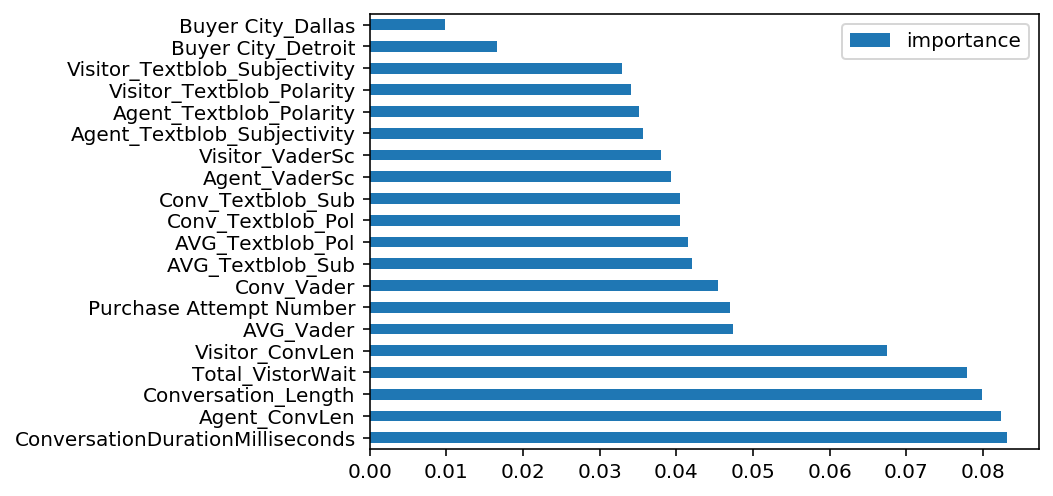

In [480]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combo_4, y_combo_4, test_size = 0.20)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform (X_test)
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn import metrics
print("Method:combo+4")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
import pandas as pd
feature_importances = pd.DataFrame(clf.feature_importances_,index = X_combo_4.columns,columns=['importance']).sort_values('importance',ascending=False)
#print (feature_importances)
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
#feature_importances.plot(kind='barh')
feature_importances.nlargest(20,'importance').plot(kind='barh')

## Permutation Importance

In [466]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.svm import SVC
my_model = RandomForestClassifier(n_estimators=100,random_state=0).fit(X_train, y_train)

perm = PermutationImportance(my_model).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_combo_4.columns.tolist())


Weight,Feature
0.0212 ± 0.0099,Purchase Attempt Number
0.0092 ± 0.0160,Conversation_Length
0.0070 ± 0.0112,Agent_VaderSc
0.0064 ± 0.0071,Buyer City_Detroit
0.0021 ± 0.0046,Agent_Textblob_Subjectivity
0.0021 ± 0.0049,Buyer City_Dallas
0.0016 ± 0.0020,Buyer City_Boston
0.0007 ± 0.0020,Abandoned
0.0005 ± 0.0018,Buyer City_Los Angeles
0.0003 ± 0.0021,ConversationEndedBy_Agent


In [474]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combo_2, y_combo_2, test_size = 0.20)
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.svm import SVC
my_model = RandomForestClassifier(n_estimators=100,random_state=0).fit(X_train, y_train)

perm = PermutationImportance(my_model).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_combo_4.columns.tolist())

Weight,Feature
0.0106 ± 0.0060,Purchase Attempt Number
0.0094 ± 0.0079,Agent_ConvLen
0.0066 ± 0.0071,Buyer City_Dallas
0.0052 ± 0.0037,ConversationDurationMilliseconds
0.0050 ± 0.0097,Agent_Textblob_Subjectivity
0.0044 ± 0.0049,Visitor_Textblob_Polarity
0.0037 ± 0.0120,Visitor_ConvLen
0.0033 ± 0.0082,Conv_Textblob_Sub
0.0030 ± 0.0050,AVG_Textblob_Pol
0.0030 ± 0.0093,Visitor_VaderSc


# XGBboosting

0.5073977371627503


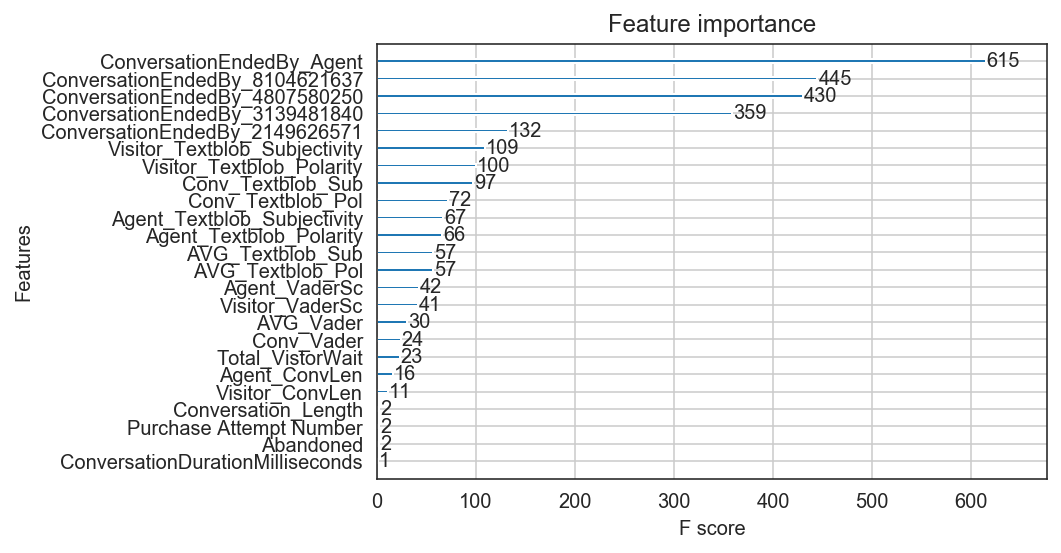

In [685]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combo_4, y_combo_4, test_size = 0.20)
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)
print (model.score(X_test,y_test))
plot_importance(model).set_yticklabels(X_combo_4.columns.values)
pyplot.show()

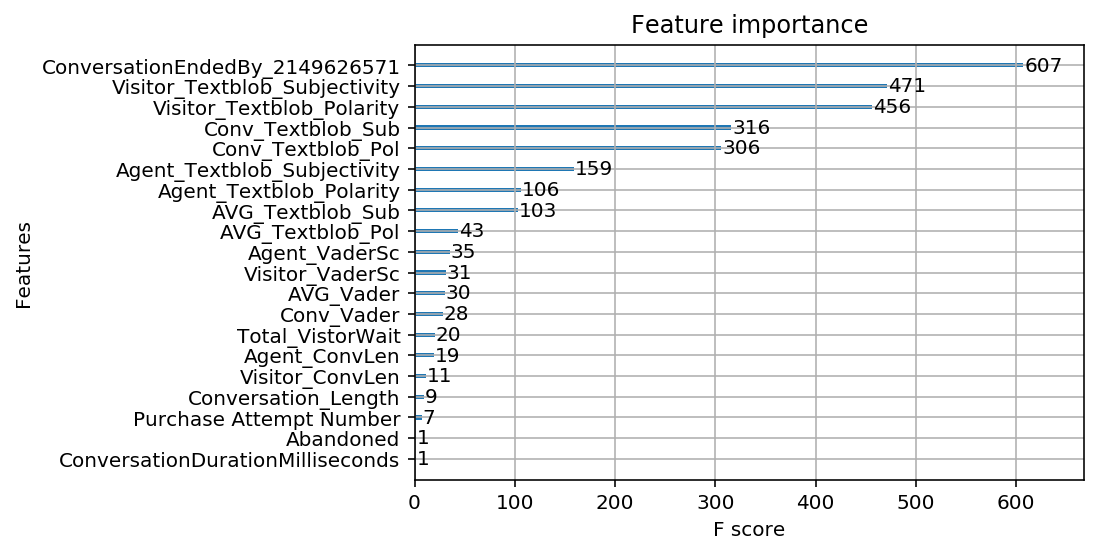

In [467]:
plot_importance(model).set_yticklabels(X_combo_4.columns.values)
pyplot.show()

# Decision Tree

Accuracy: 0.4421235857267189
                                        importance
Agent_ConvLen                             0.605496
Purchase Attempt Number                   0.224640
Buyer City_Detroit                        0.107335
ConversationDurationMilliseconds          0.062529
Buyer City_Los Angeles                    0.000000
Buyer City_Boston                         0.000000
Buyer City_Chicago                        0.000000
Buyer City_Dallas                         0.000000
Buyer City_Denver                         0.000000
Buyer City_Fort Worth                     0.000000
Buyer City_Foster City                    0.000000
Buyer City_Houston                        0.000000
Buyer City_Kansas City                    0.000000
Buyer City_New York                       0.000000
Buyer City_Anchorage                      0.000000
Buyer City_Oakland                        0.000000
Buyer City_Phoenix                        0.000000
Buyer City_Portland                       0.000000
Bu

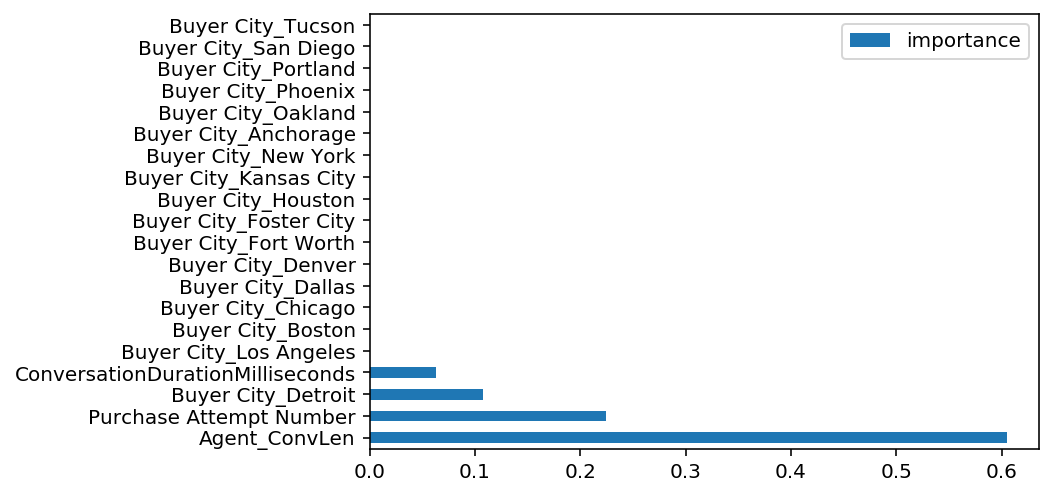

In [483]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combo_4, y_combo_4, test_size = 0.20)
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf2 = clf2.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
import pandas as pd
feature_importances = pd.DataFrame(clf2.feature_importances_,index = X_combo_4.columns,columns=['importance']).sort_values('importance',ascending=False)
print (feature_importances)
import pandas as pd
%matplotlib inline
feature_importances.abs()
feature_importances.nlargest(20,'importance').plot(kind='barh')

                                        importance
Agent_ConvLen                             0.562463
Purchase Attempt Number                   0.218558
Buyer City_Detroit                        0.120232
ConversationDurationMilliseconds          0.098746
Buyer City_Los Angeles                    0.000000
Buyer City_Boston                         0.000000
Buyer City_Chicago                        0.000000
Buyer City_Dallas                         0.000000
Buyer City_Denver                         0.000000
Buyer City_Fort Worth                     0.000000
Buyer City_Foster City                    0.000000
Buyer City_Houston                        0.000000
Buyer City_Kansas City                    0.000000
Buyer City_New York                       0.000000
Buyer City_Anchorage                      0.000000
Buyer City_Oakland                        0.000000
Buyer City_Phoenix                        0.000000
Buyer City_Portland                       0.000000
Buyer City_San Diego           

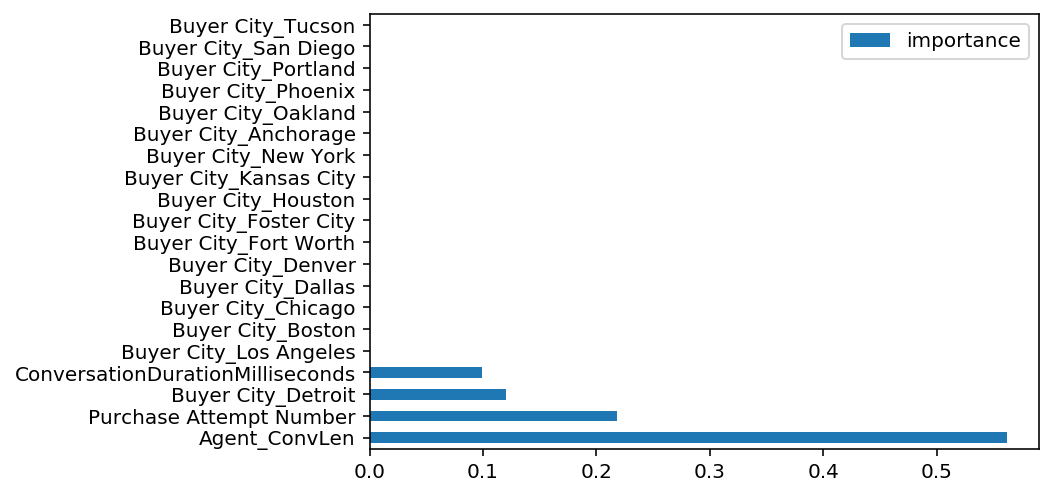

In [422]:
import pandas as pd
feature_importances = pd.DataFrame(clf2.feature_importances_,index = X_combo_4.columns,columns=['importance']).sort_values('importance',ascending=False)
print (feature_importances)
import pandas as pd
%matplotlib inline
feature_importances.abs()
feature_importances.nlargest(20,'importance').plot(kind='barh')

# Data Conclusion after Training 

In [639]:
df=pd.read_csv("/Users/n.y.r/Desktop/EPIK/combo_model.csv")

In [584]:
df['y_4classes'].value_counts()

3    2640
1    1571
0    1492
2      41
Name: y_4classes, dtype: int64

In [586]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5744 entries, 0 to 5743
Data columns (total 50 columns):
Unnamed: 0                                5744 non-null int64
ConversationDurationMilliseconds          5744 non-null int64
Abandoned                                 5744 non-null int64
Purchase Attempt Number                   5744 non-null int64
Conversation_Length                       5744 non-null int64
Visitor_ConvLen                           5744 non-null int64
Agent_ConvLen                             5744 non-null int64
y_4classes                                5744 non-null int64
y_2classes                                5744 non-null int64
Total_VistorWait                          5744 non-null float64
Conv_Vader                                5744 non-null float64
AVG_Vader                                 5744 non-null float64
Visitor_VaderSc                           5744 non-null float64
Agent_VaderSc                             5744 non-null float64
AVG_Textblob_Po

/Users/n.y.r/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


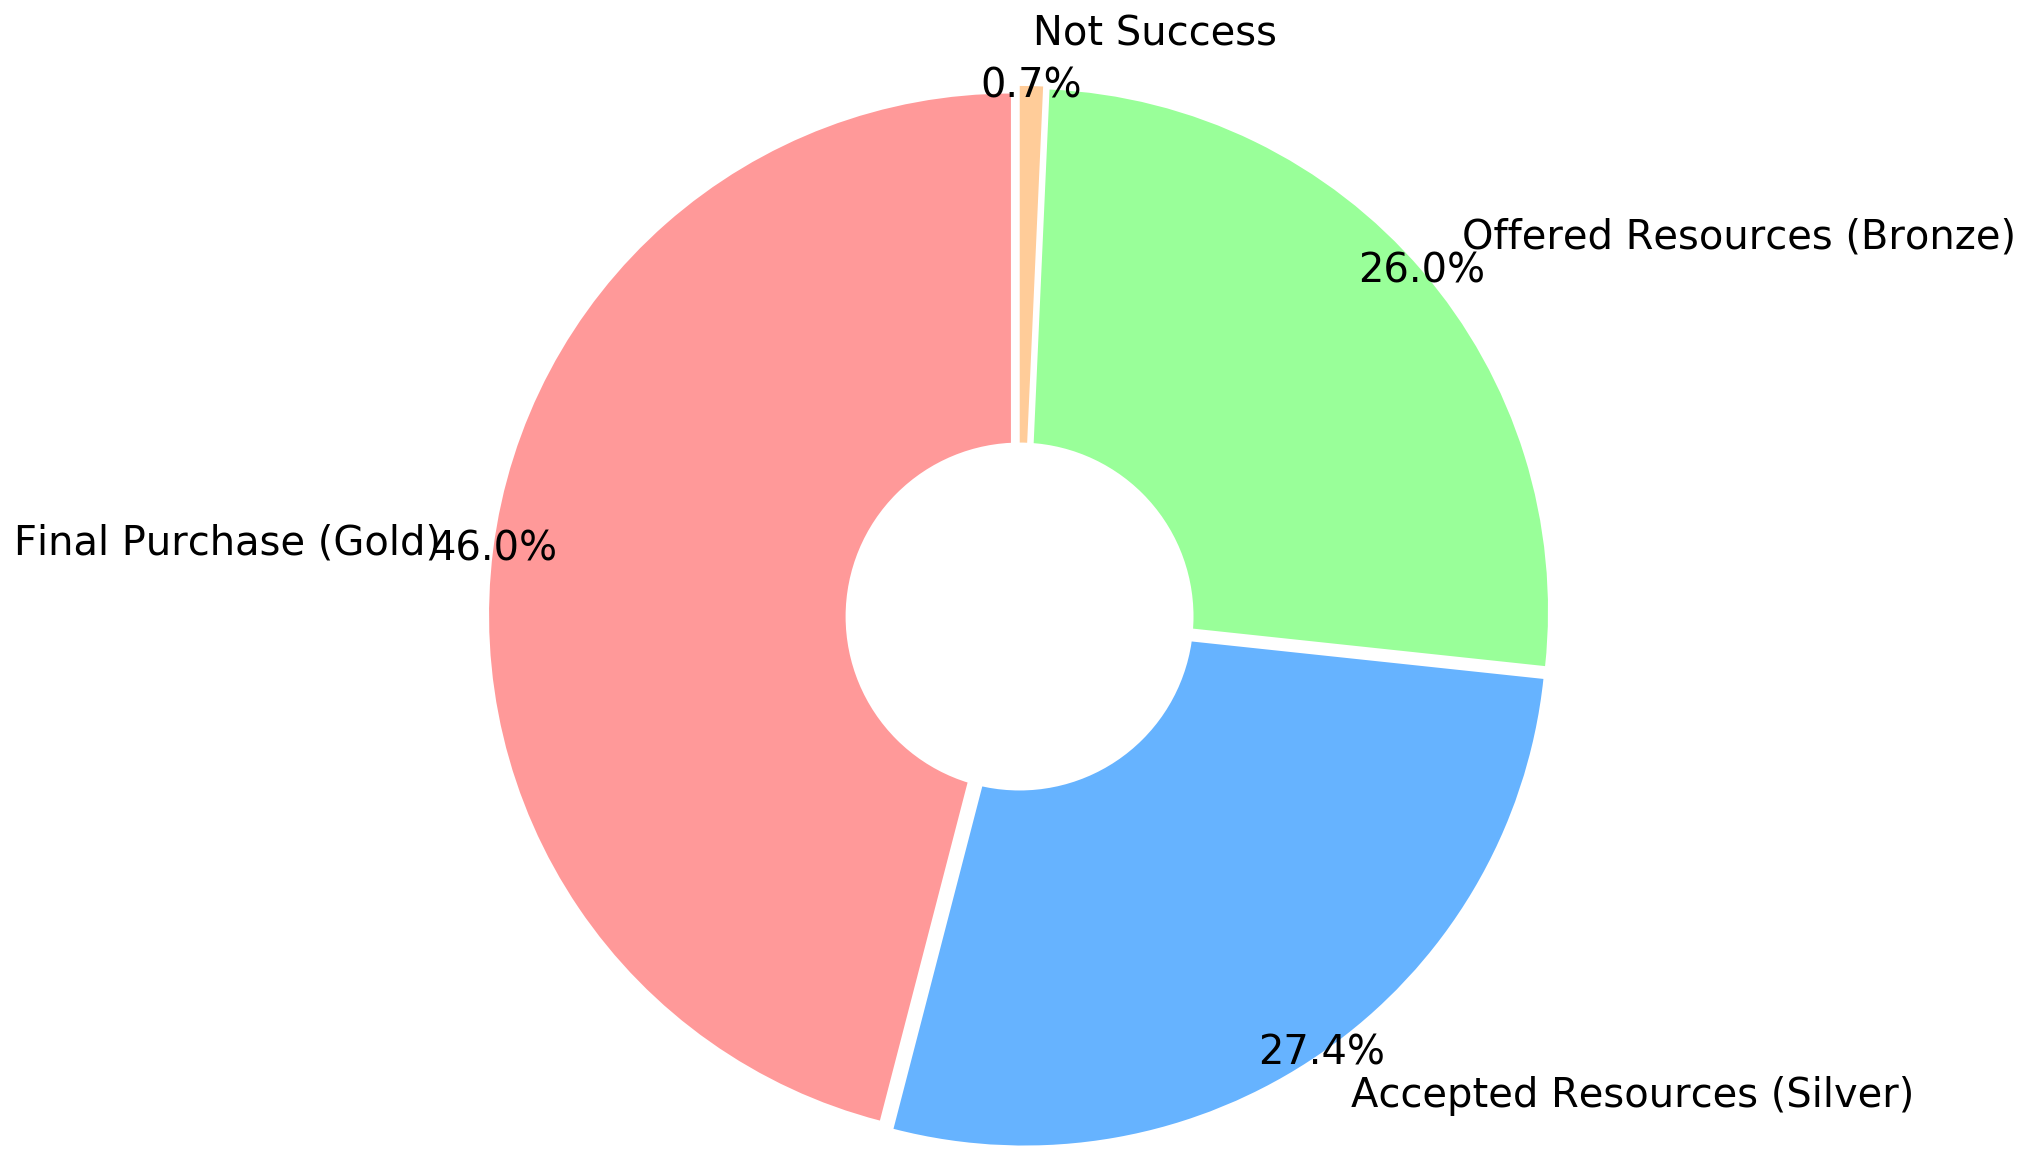

In [547]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['Final Purchase (Gold)', 'Accepted Resources (Silver)', 'Offered Resources (Bronze)', 'Not Success']
sizes = [2640, 1571, 1492, 41]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05,0.05,0.05)
import matplotlib as mpl
mpl.rcParams['font.size'] = 20.0 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=1, explode = explode,radius=3)
#draw circle
centre_circle = plt.Circle((0,0),1.0,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [548]:
df['y_2classes'].value_counts()

1    4252
0    1492
Name: y_2classes, dtype: int64

/Users/n.y.r/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


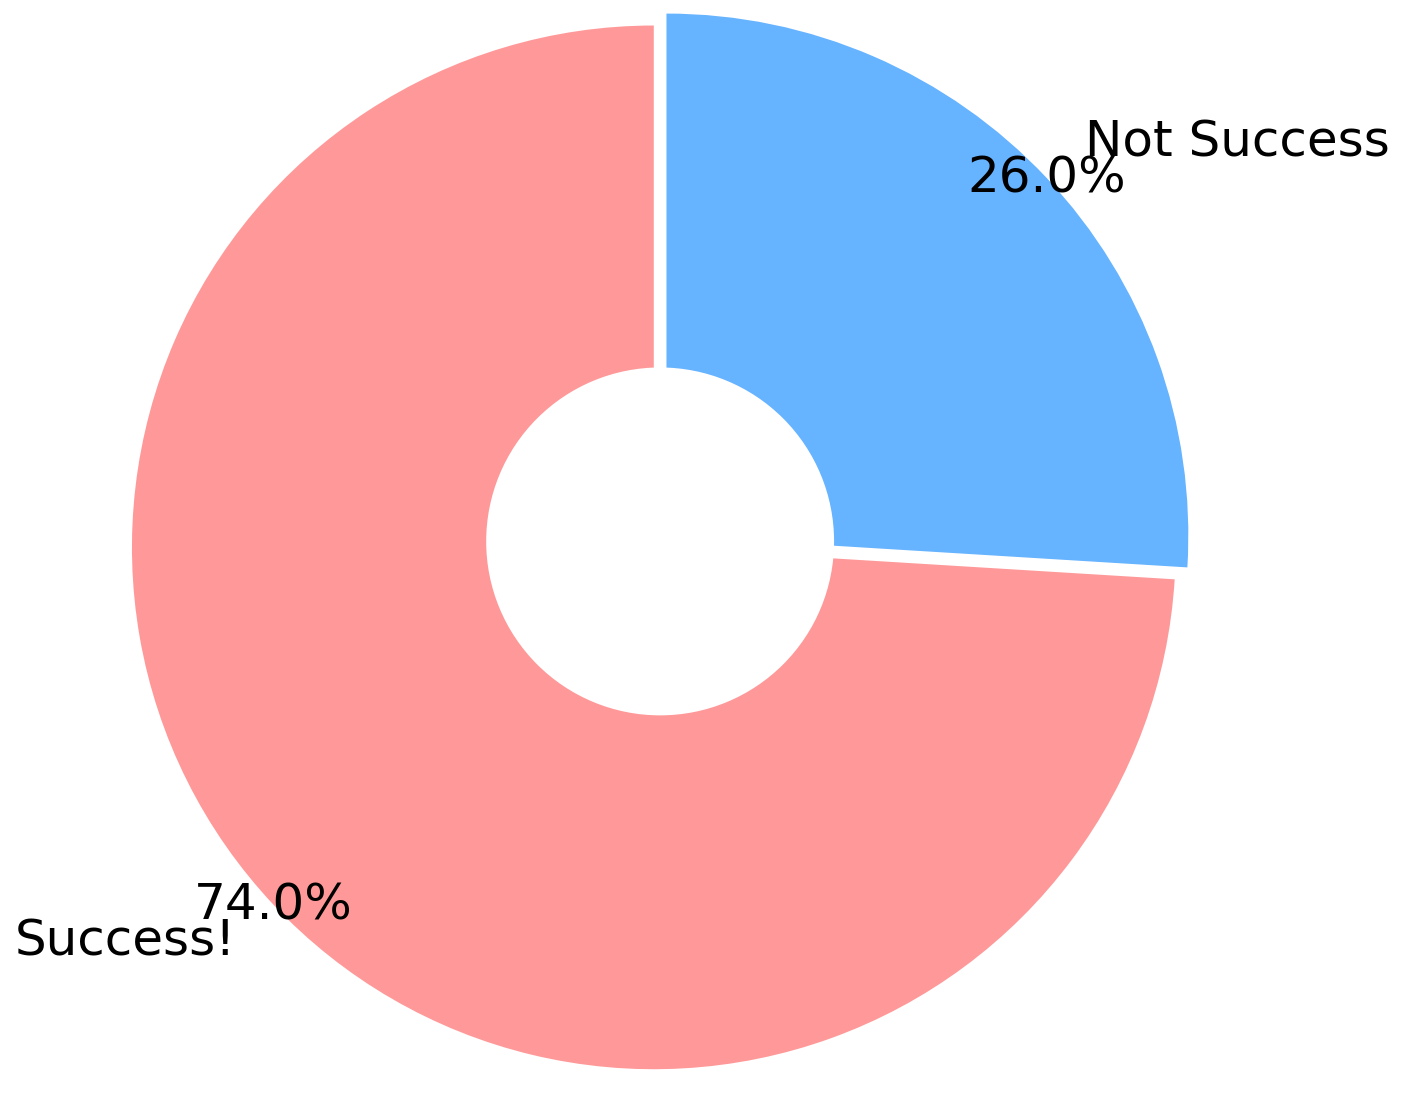

In [552]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['Success!', 'Not Success']
sizes = [4252,1492]
#colors
colors = ['#ff9999','#66b3ff']
#explsion
explode = (0.05,0.05)
import matplotlib as mpl
mpl.rcParams['font.size'] = 25.0 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=1, explode = explode,radius=3)
#draw circle
centre_circle = plt.Circle((0,0),1.0,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

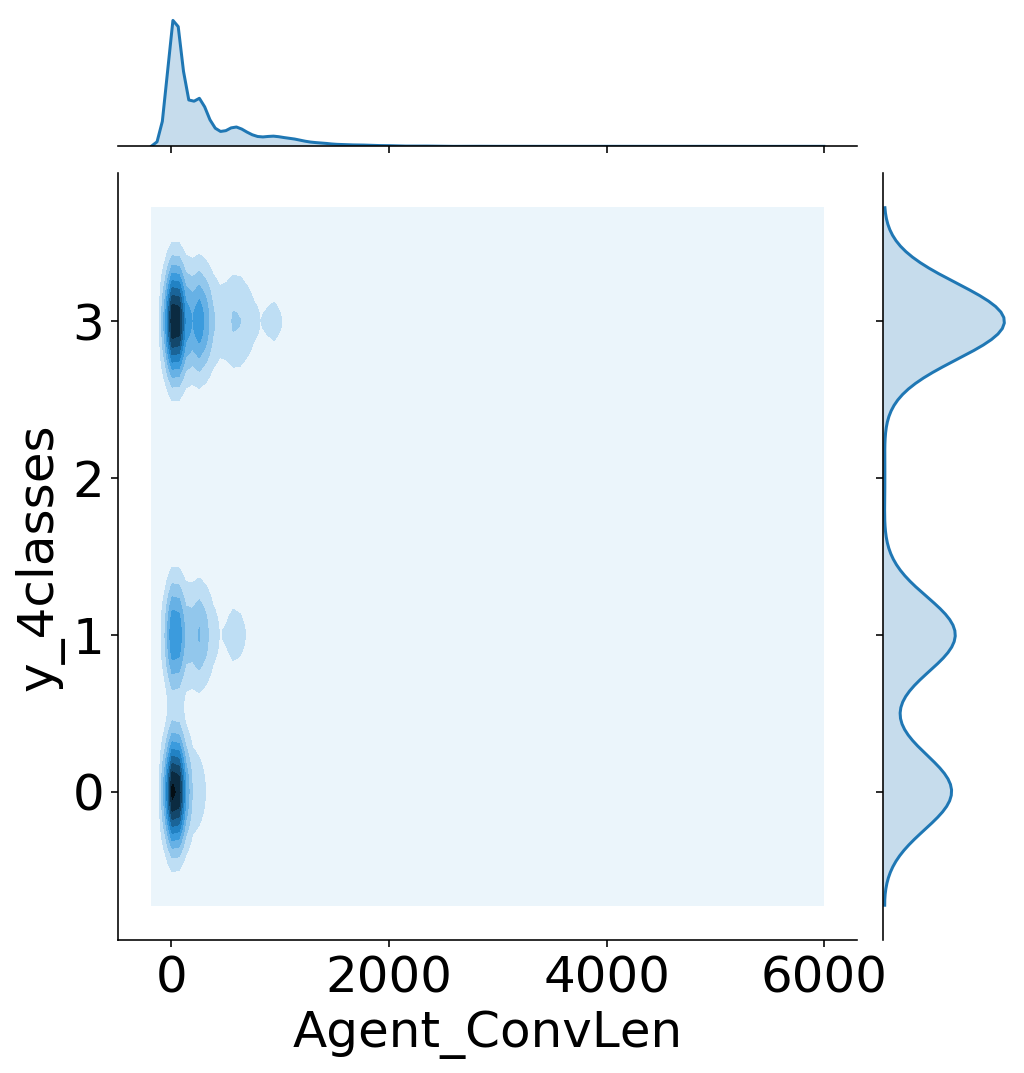

In [570]:
sns.jointplot(x ='Agent_ConvLen', y ='y_4classes', data = df, kind ='kde',height=8)

In [575]:
new1 = df[['Agent_ConvLen', 'y_4classes', 'y_2classes']].copy()

In [576]:
new1=new1.sort_values(by='Agent_ConvLen', ascending=False)

In [577]:
new1=new1.head(100)

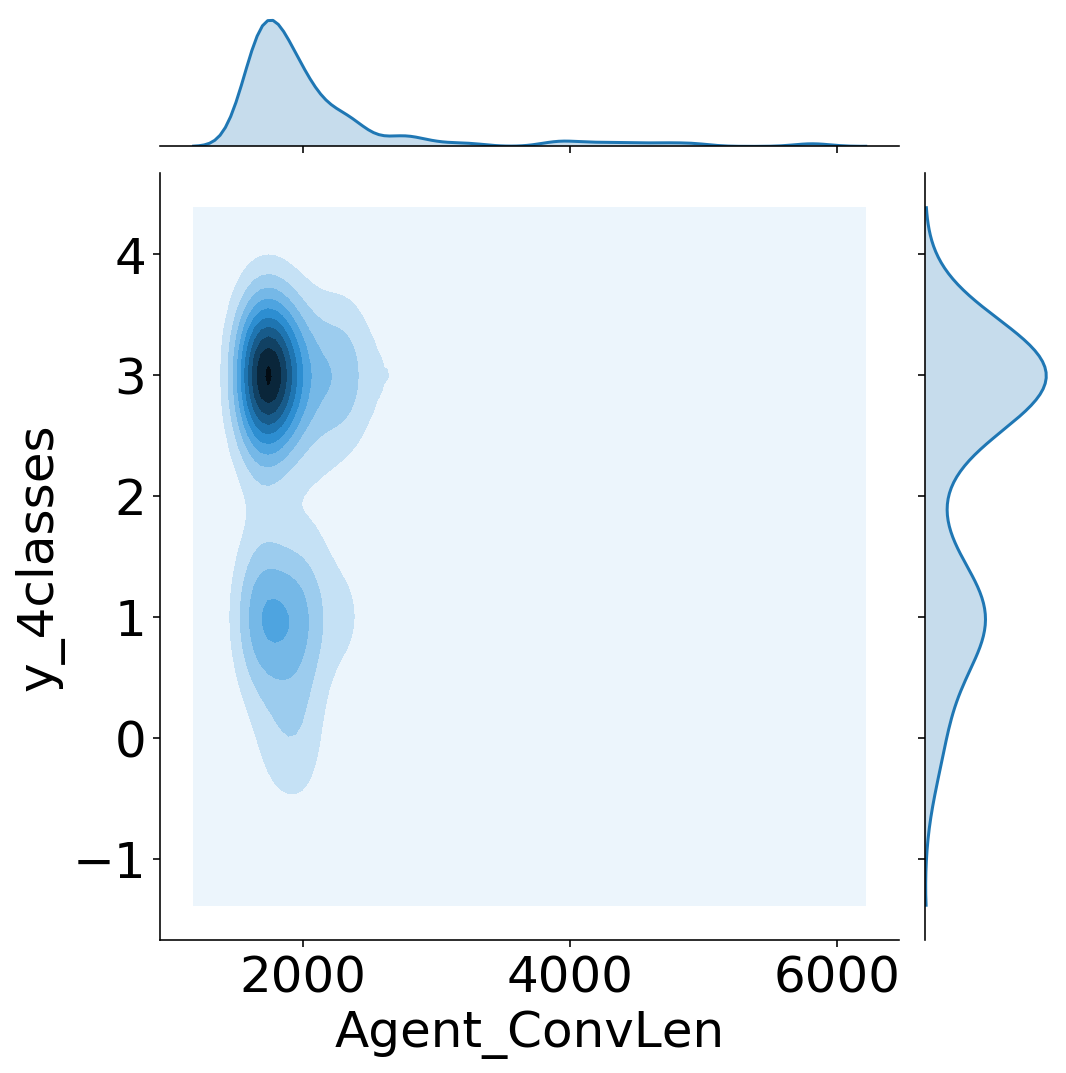

In [578]:
sns.jointplot(x ='Agent_ConvLen', y ='y_4classes', data = new1, kind ='kde',height=8)

In [579]:
new1.head(10)

,Agent_ConvLen,y_4classes,y_2classes
3112,5816,3,1
3377,4911,3,1
5329,4672,2,1
3129,4418,3,1
4184,4204,1,1
5212,3981,3,1
4819,3887,1,1
5248,3238,1,1
3128,2996,0,0
1612,2815,1,1


In [611]:
x1=df['Visitor_VaderSc']
x2=df['Visitor_Textblob_Polarity']
x3=df['Visitor_Textblob_Subjectivity']

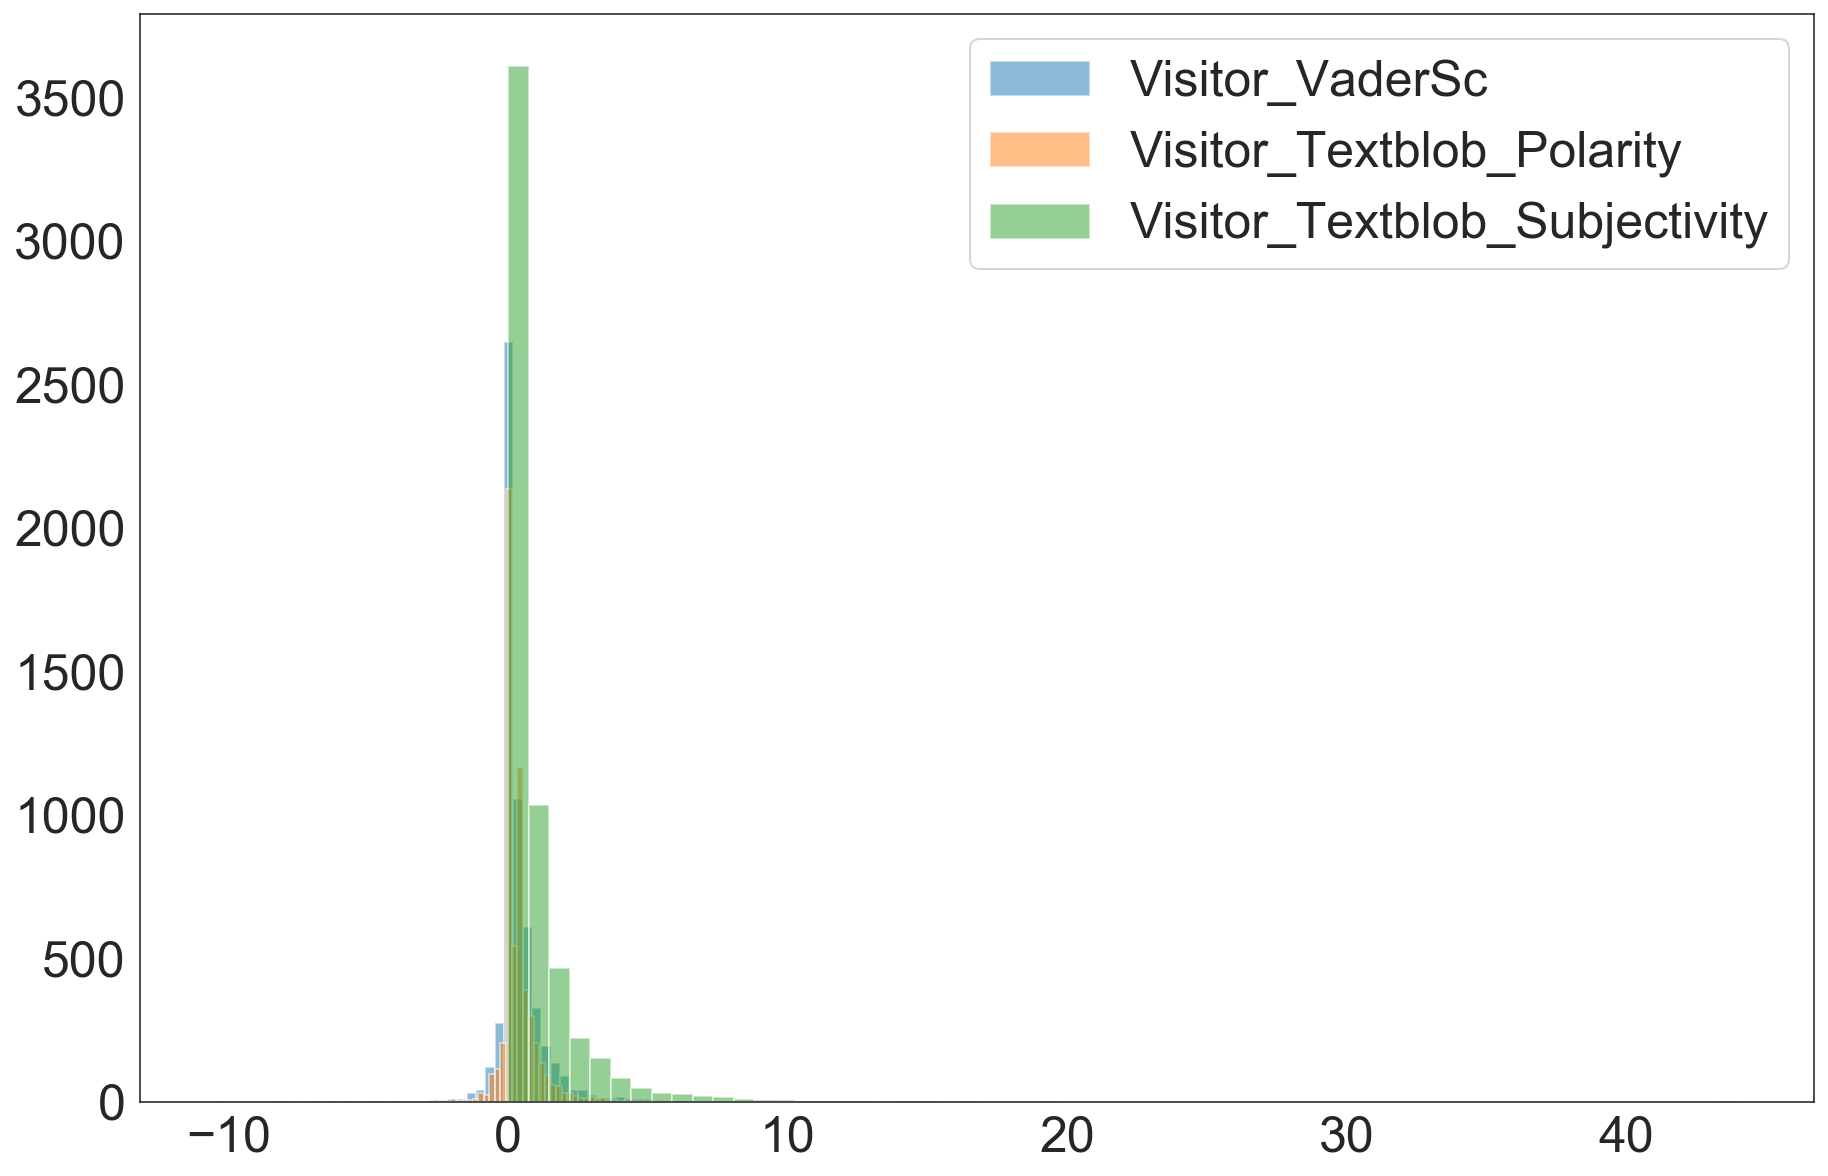

In [615]:
bins =60
pyplot.figure(figsize=(15,10))
pyplot.hist(x1, bins, alpha=0.5, label='Visitor_Vader')
pyplot.hist(x2, bins, alpha=0.5, label='Visitor_Textblob_Polarity')
pyplot.hist(x3, bins, alpha=0.5, label='Visitor_Textblob_Subjectivity')
pyplot.legend(loc='upper right')
pyplot.show()

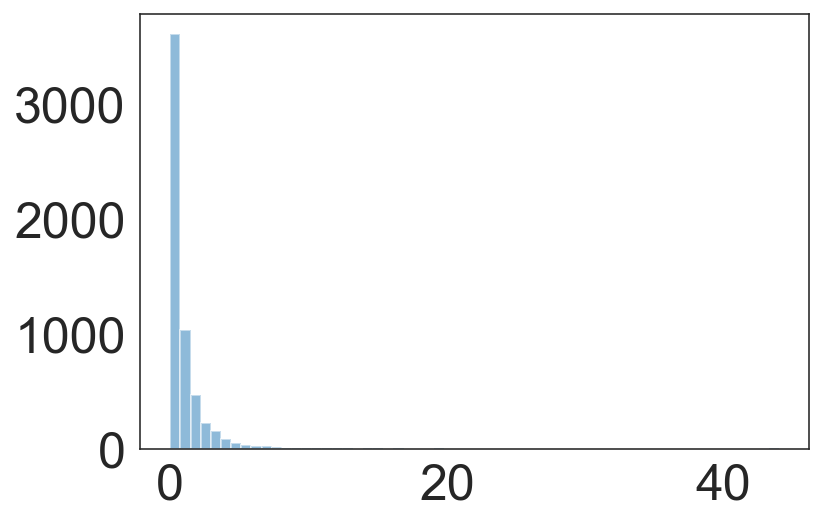

In [616]:
pyplot.hist(x3, bins, alpha=0.5, label='Visitor_Textblob_Subjectivity')
pyplot.show()

In [643]:
x1=df['Agent_VaderSc']
x2=df['Agent_Textblob_Polarity']
x3=df['Agent_Textblob_Subjectivity']
x4=df['Visitor_VaderSc']
x5=df['Visitor_Textblob_Polarity']
x6=df['Visitor_Textblob_Subjectivity']

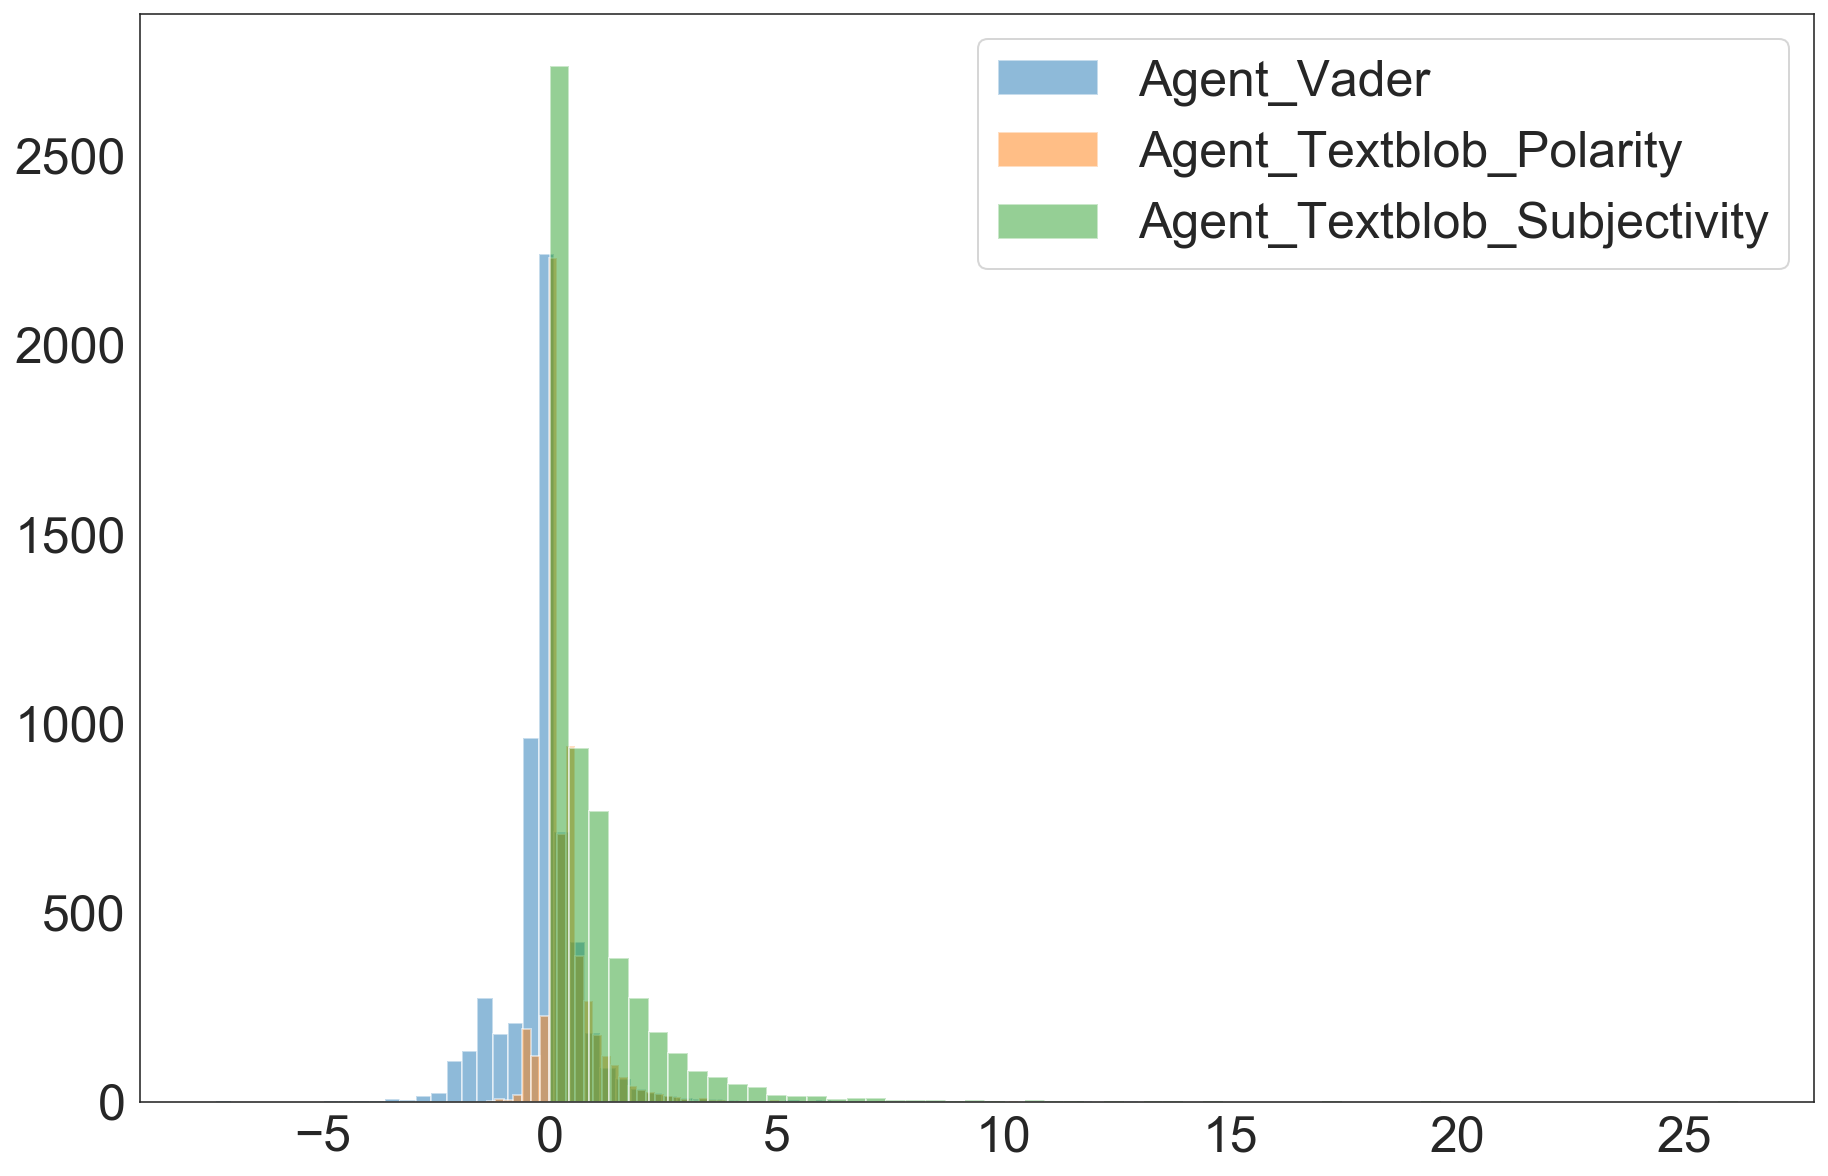

In [641]:
bins =60
pyplot.figure(figsize=(15,10))
pyplot.hist(x4, bins, alpha=0.5, label='Vis_Vader')
pyplot.hist(x5, bins, alpha=0.5, label='Agent_Textblob_Polarity')
pyplot.hist(x6, bins, alpha=0.5, label='Agent_Textblob_Subjectivity')
pyplot.legend(loc='upper right')
pyplot.show()

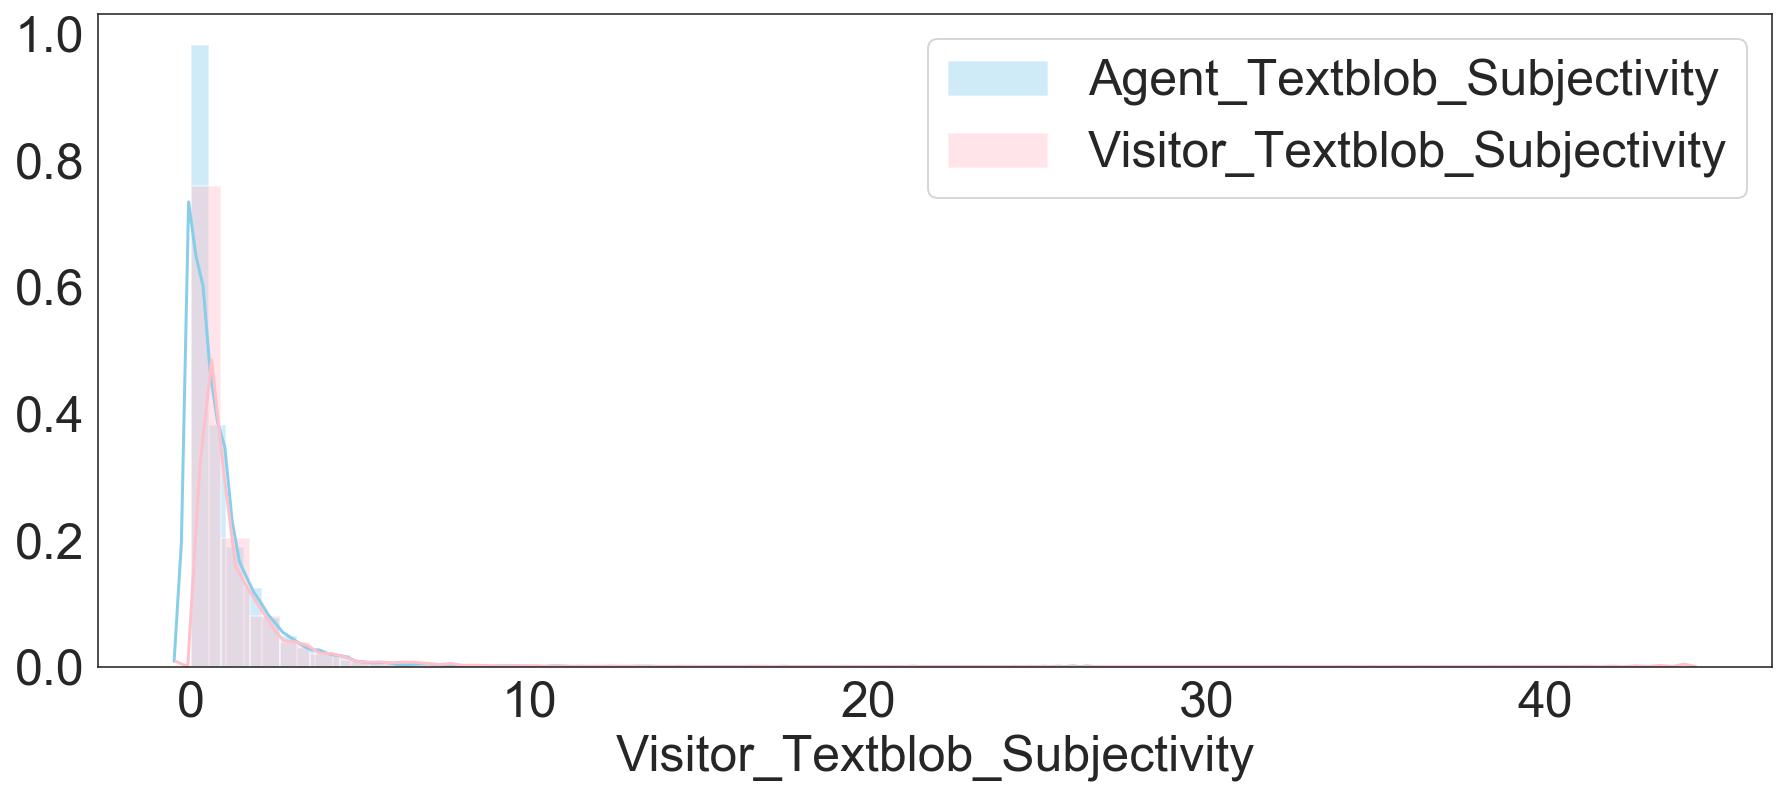

In [656]:
plt.figure(figsize=(15, 6))
sns.distplot( x3 , color="skyblue", label="Agent_Textblob_Subjectivity")
sns.distplot( x6 , color="pink", label="Visitor_Textblob_Subjectivity")
plt.legend()
plt.show()


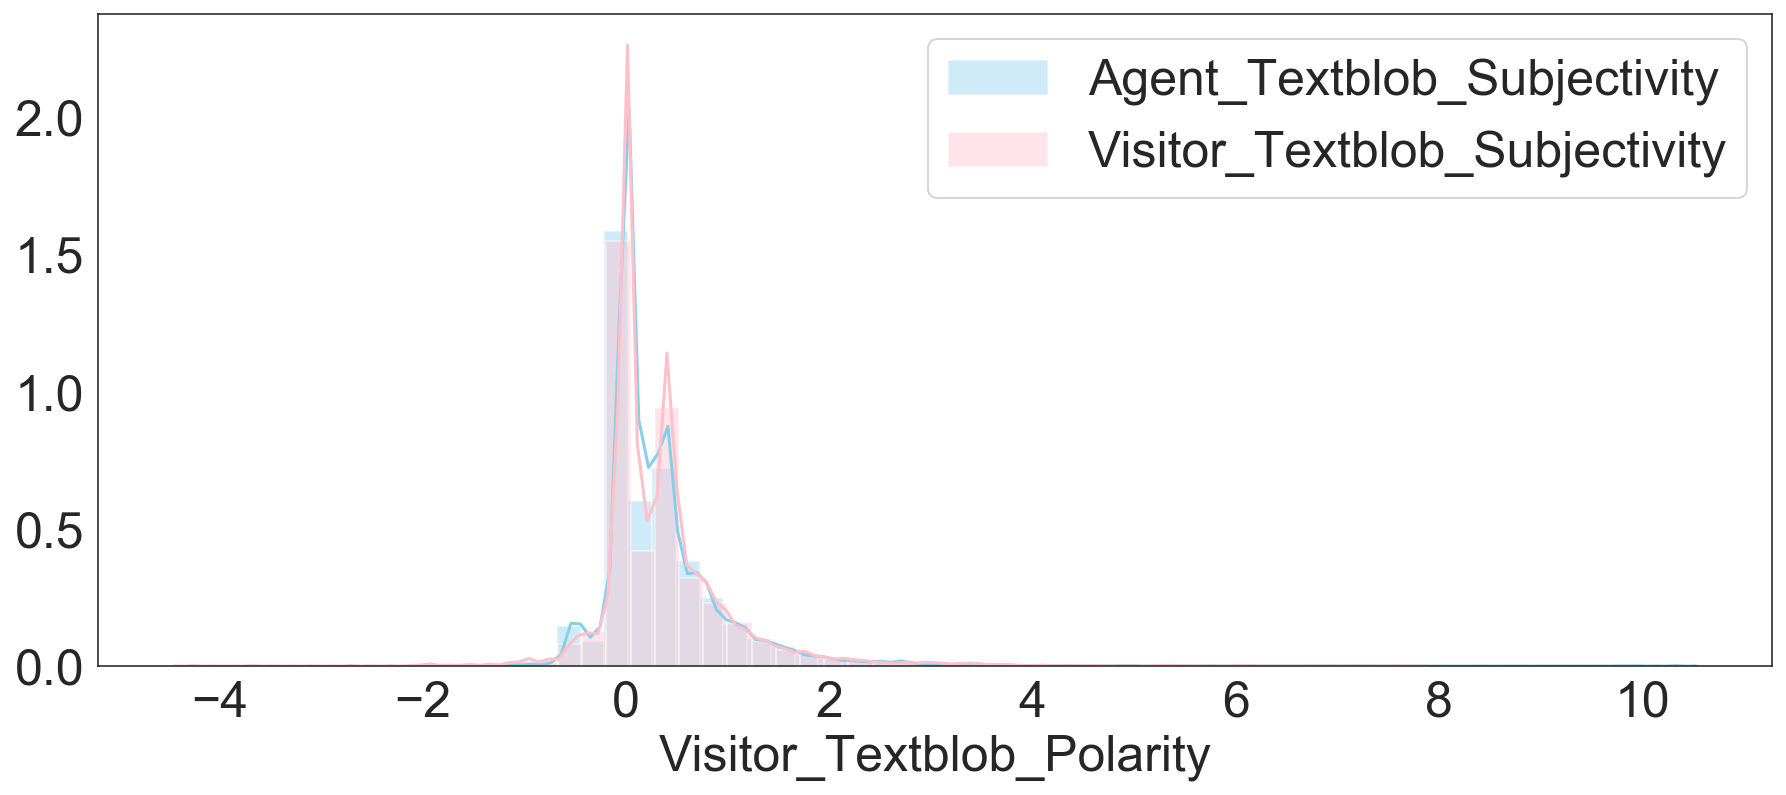

In [657]:
plt.figure(figsize=(15, 6))
sns.distplot( x2 , color="skyblue", label="Agent_Textblob_Subjectivity")
sns.distplot( x5 , color="pink", label="Visitor_Textblob_Subjectivity")
plt.legend()
plt.show()